### FLOP counts as constants for direct use

In [9]:
APE_FLOPS_384_with_768_1ep = 14.675

HNET_FLOPS_12_4_with_768_1ep = 22.165
HNET_FLOPS_12_4_with_384_1ep = 14.408
HNET_FLOPS_12_4_with_1024_1ep = 27.34165

HNET_FLOPS_18_6_with_768_1ep = 33.25
HNET_FLOPS_30_10_with_768_1ep = 55.4
HNET_FLOPS_24_8_with_768_1ep = 44.3366

CHKNET_FLOPS_12_4_with_768_1ep = 11.9373

def get_ape_flops(i, t):
    x = (APE_FLOPS_384_with_768_1ep / 384) * i
    y = (x / 768) * t
    return y


In [32]:
tmp = [
    10 * get_ape_flops(384, 768) * e + \
    10 * get_ape_flops(768, 768) * e + \
    10 * get_ape_flops(1024, 768) * e for e in [5]
]
tmp

[4157.916666666666]

### APE on average InfoNCE loss across all combinations

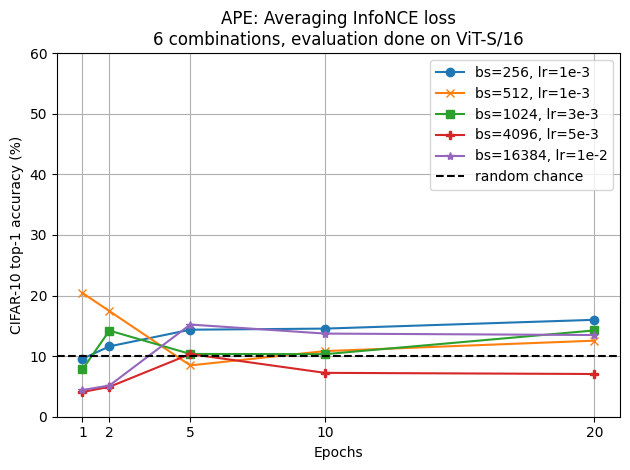

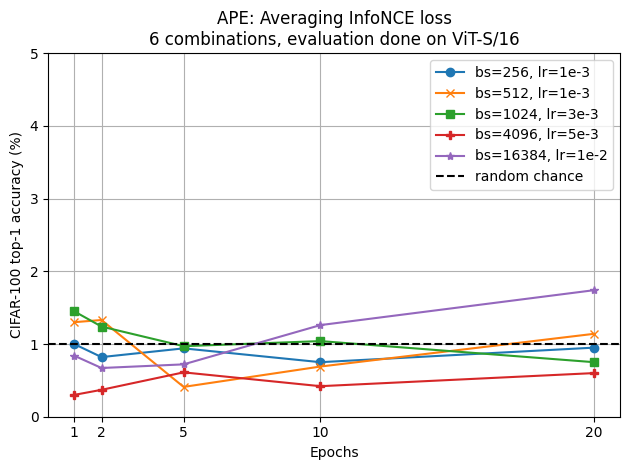

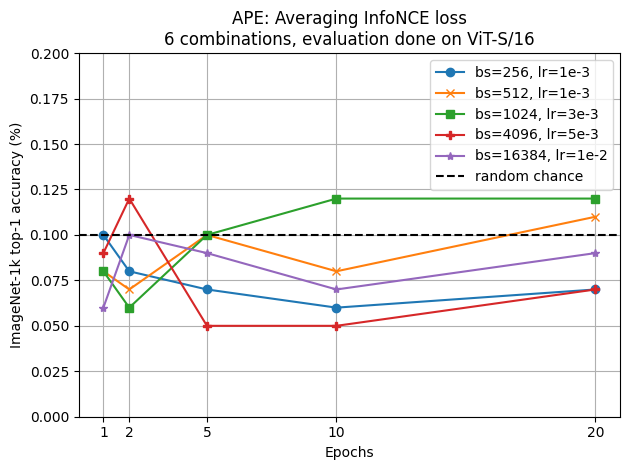

In [35]:
from pylab import plt

data_256 = {'exp_name': 'vits_bs-256_lr-0.001', 'seed': 0, 'eval': {'epoch_1': {'cifar10': 9.56, 'cifar100': 1.0, 'imagenet1k': 0.1}, 'epoch_2': {'cifar10': 11.61, 'cifar100': 0.82, 'imagenet1k': 0.08}, 'epoch_5': {'cifar10': 14.36, 'cifar100': 0.94, 'imagenet1k': 0.07}, 'epoch_10': {'cifar10': 14.54, 'cifar100': 0.75, 'imagenet1k': 0.06}, 'epoch_20': {'cifar10': 15.99, 'cifar100': 0.95, 'imagenet1k': 0.07}}}
data_512 = {'exp_name': 'vits_bs-512_lr-0.001', 'seed': 0, 'eval': {'epoch_1': {'cifar10': 20.42, 'cifar100': 1.3, 'imagenet1k': 0.08}, 'epoch_2': {'cifar10': 17.43, 'cifar100': 1.33, 'imagenet1k': 0.07}, 'epoch_5': {'cifar10': 8.47, 'cifar100': 0.41, 'imagenet1k': 0.1}, 'epoch_10': {'cifar10': 10.83, 'cifar100': 0.69, 'imagenet1k': 0.08}, 'epoch_20': {'cifar10': 12.55, 'cifar100': 1.14, 'imagenet1k': 0.11}}}
data_1024 = {'exp_name': 'vits_bs-1024_lr-0.003', 'seed': 0, 'eval': {'epoch_1': {'cifar10': 7.83, 'cifar100': 1.45, 'imagenet1k': 0.08}, 'epoch_2': {'cifar10': 14.21, 'cifar100': 1.24, 'imagenet1k': 0.06}, 'epoch_5': {'cifar10': 10.36, 'cifar100': 0.97, 'imagenet1k': 0.1}, 'epoch_10': {'cifar10': 10.32, 'cifar100': 1.04, 'imagenet1k': 0.12}, 'epoch_20': {'cifar10': 14.24, 'cifar100': 0.75, 'imagenet1k': 0.12}}}
data_4096 = {'exp_name': 'vits_bs-4096_lr-0.005', 'seed': 0, 'eval': {'epoch_1': {'cifar10': 4.08, 'cifar100': 0.3, 'imagenet1k': 0.09}, 'epoch_2': {'cifar10': 4.93, 'cifar100': 0.37, 'imagenet1k': 0.12}, 'epoch_5': {'cifar10': 10.34, 'cifar100': 0.61, 'imagenet1k': 0.05}, 'epoch_10': {'cifar10': 7.24, 'cifar100': 0.42, 'imagenet1k': 0.05}, 'epoch_20': {'cifar10': 7.05, 'cifar100': 0.6, 'imagenet1k': 0.07}}}
data_16384 = {'exp_name': 'vits_bs-16384_lr-0.001', 'seed': 0, 'eval': {'epoch_1': {'cifar10': 4.41, 'cifar100': 0.84, 'imagenet1k': 0.06}, 'epoch_2': {'cifar10': 5.15, 'cifar100': 0.67, 'imagenet1k': 0.1}, 'epoch_5': {'cifar10': 15.21, 'cifar100': 0.72, 'imagenet1k': 0.09}, 'epoch_10': {'cifar10': 13.72, 'cifar100': 1.26, 'imagenet1k': 0.07}, 'epoch_20': {'cifar10': 13.48, 'cifar100': 1.74, 'imagenet1k': 0.09}}}

epochs = [1, 2, 5, 10, 20]
benchmarks = ["cifar10", "cifar100", "imagenet1k"]
names = {"cifar10": "CIFAR-10", "cifar100": "CIFAR-100", "imagenet1k": "ImageNet-1k"}
lims = {"cifar10": [0.0, 60.0], "cifar100": [0.0, 5.0], "imagenet1k": [0.0, 0.2]}
rcs = {"cifar10": 10.0, "cifar100": 1.0, "imagenet1k": 0.1}

for bench in benchmarks:
    acc_256 = [data_256['eval'][f'epoch_{epoch}'][bench] for epoch in epochs]
    acc_512 = [data_512['eval'][f'epoch_{epoch}'][bench] for epoch in epochs]
    acc_1024 = [data_1024['eval'][f'epoch_{epoch}'][bench] for epoch in epochs]
    acc_4096 = [data_4096['eval'][f'epoch_{epoch}'][bench] for epoch in epochs]
    acc_16384 = [data_16384['eval'][f'epoch_{epoch}'][bench] for epoch in epochs]

    # Create the plot
    # plt.figure(figsize=(10, 6))

    plt.plot(epochs, acc_256, marker='o', label="bs=256, lr=1e-3")
    plt.plot(epochs, acc_512, marker='x', label="bs=512, lr=1e-3")
    plt.plot(epochs, acc_1024, marker='s', label="bs=1024, lr=3e-3")
    plt.plot(epochs, acc_4096, marker='P', label="bs=4096, lr=5e-3")
    plt.plot(epochs, acc_16384, marker='*', label="bs=16384, lr=1e-2")

    plt.axhline(y=rcs[bench], color="black", linestyle="--", label="random chance")

    plt.title(f'APE: Averaging InfoNCE loss\n6 combinations, evaluation done on ViT-S/16')
    plt.xlabel('Epochs')
    plt.ylabel(f'{names[bench]} top-1 accuracy (%)')
    plt.ylim(lims[bench])
    plt.xticks([1, 2, 5, 10, 20])
    plt.grid(True)

    # Save and show the plot
    plt.legend()
    plt.tight_layout()
    # plt.savefig('imagenet_accuracy_plot.png')
    plt.show()

### Full MLP H-Net (`num_ie=12`, `encoder_batch_size=4`) Batch ablation

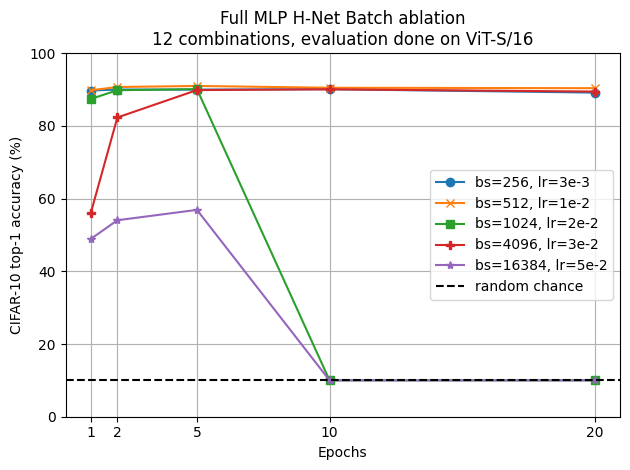

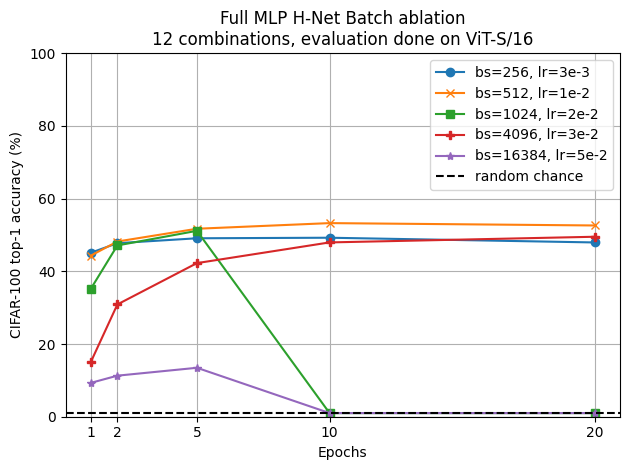

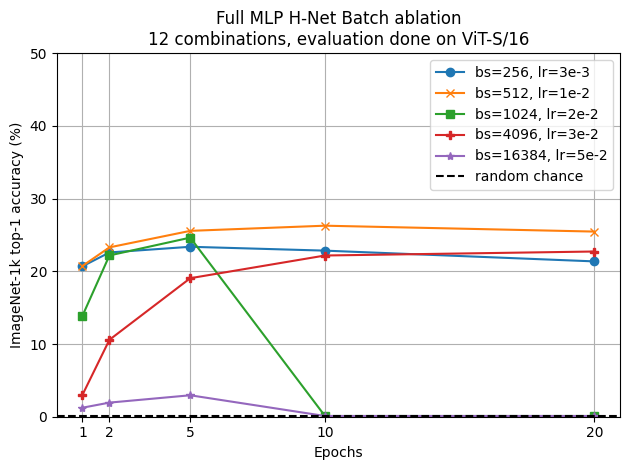

In [28]:
from pylab import plt


data_256 = {'exp_name': 'hnet_12-4_fmlp_c-32_bs-256_lr-3e-3', 'seed': 0, 'eval': {'epoch_1': {'cifar10': 89.71, 'cifar100': 45.1, 'imagenet1k': 20.69}, 'epoch_2': {'cifar10': 89.99, 'cifar100': 47.73, 'imagenet1k': 22.59}, 'epoch_5': {'cifar10': 89.97, 'cifar100': 49.08, 'imagenet1k': 23.37}, 'epoch_10': {'cifar10': 90.08, 'cifar100': 49.23, 'imagenet1k': 22.84}, 'epoch_20': {'cifar10': 89.15, 'cifar100': 47.93, 'imagenet1k': 21.36}}}
data_512 = {'exp_name': 'hnet_12-4_fmlp_c-32_bs-512_lr-1e-2', 'seed': 0, 'eval': {'epoch_1': {'cifar10': 89.79, 'cifar100': 44.31, 'imagenet1k': 20.74}, 'epoch_2': {'cifar10': 90.68, 'cifar100': 48.19, 'imagenet1k': 23.29}, 'epoch_5': {'cifar10': 90.97, 'cifar100': 51.7, 'imagenet1k': 25.56}, 'epoch_10': {'cifar10': 90.48, 'cifar100': 53.25, 'imagenet1k': 26.27}, 'epoch_20': {'cifar10': 90.36, 'cifar100': 52.6, 'imagenet1k': 25.46}}}
data_1024 = {'exp_name': 'hnet_12-4_fmlp_c-32_bs-1024_lr-2e-2', 'seed': 0, 'eval': {'epoch_1': {'cifar10': 87.4, 'cifar100': 35.19, 'imagenet1k': 13.89}, 'epoch_2': {'cifar10': 89.8, 'cifar100': 47.11, 'imagenet1k': 22.18}, 'epoch_5': {'cifar10': 90.1, 'cifar100': 51.13, 'imagenet1k': 24.63}, 'epoch_10': {'cifar10': 10.0, 'cifar100': 1.0, 'imagenet1k': 0.1}, 'epoch_20': {'cifar10': 10.0, 'cifar100': 1.0, 'imagenet1k': 0.1}}}
data_4096 = {'exp_name': 'hnet_12-4_fmlp_c-32_bs-4096_lr-3e-2', 'seed': 0, 'eval': {'epoch_1': {'cifar10': 56.09, 'cifar100': 15.07, 'imagenet1k': 3.02}, 'epoch_2': {'cifar10': 82.3, 'cifar100': 30.88, 'imagenet1k': 10.58}, 'epoch_5': {'cifar10': 89.84, 'cifar100': 42.25, 'imagenet1k': 19.05}, 'epoch_10': {'cifar10': 90.05, 'cifar100': 47.94, 'imagenet1k': 22.17}, 'epoch_20': {'cifar10': 89.43, 'cifar100': 49.5, 'imagenet1k': 22.72}}} 
data_16384 = {'exp_name': 'hnet_12-4_fmlp_c-32_bs-16384_lr-5e-2', 'seed': 0, 'eval': {'epoch_1': {'cifar10': 48.91, 'cifar100': 9.31, 'imagenet1k': 1.24}, 'epoch_2': {'cifar10': 54.04, 'cifar100': 11.29, 'imagenet1k': 1.94}, 'epoch_5': {'cifar10': 56.89, 'cifar100': 13.46, 'imagenet1k': 2.95}, 'epoch_10': {'cifar10': 10.0, 'cifar100': 1.0, 'imagenet1k': 0.1}, 'epoch_20': {'cifar10': 10.0, 'cifar100': 1.0, 'imagenet1k': 0.1}}}

epochs = [1, 2, 5, 10, 20]
benchmarks = ["cifar10", "cifar100", "imagenet1k"]
names = {"cifar10": "CIFAR-10", "cifar100": "CIFAR-100", "imagenet1k": "ImageNet-1k"}
lims = {"cifar10": [0.0, 100.0], "cifar100": [0.0, 100.0], "imagenet1k": [0.0, 50]}
rcs = {"cifar10": 10.0, "cifar100": 1.0, "imagenet1k": 0.1}

for bench in benchmarks:
    acc_256 = [data_256['eval'][f'epoch_{epoch}'][bench] for epoch in epochs]
    acc_512 = [data_512['eval'][f'epoch_{epoch}'][bench] for epoch in epochs]
    acc_1024 = [data_1024['eval'][f'epoch_{epoch}'][bench] for epoch in epochs]
    acc_4096 = [data_4096['eval'][f'epoch_{epoch}'][bench] for epoch in epochs]
    acc_16384 = [data_16384['eval'][f'epoch_{epoch}'][bench] for epoch in epochs]

    # Create the plot
    # plt.figure(figsize=(10, 6))

    plt.plot(epochs, acc_256, marker='o', label="bs=256, lr=3e-3")
    plt.plot(epochs, acc_512, marker='x', label="bs=512, lr=1e-2")
    plt.plot(epochs, acc_1024, marker='s', label="bs=1024, lr=2e-2")
    plt.plot(epochs, acc_4096, marker='P', label="bs=4096, lr=3e-2")
    plt.plot(epochs, acc_16384, marker='*', label="bs=16384, lr=5e-2")

    plt.axhline(y=rcs[bench], color="black", linestyle="--", label="random chance")

    plt.title(f'Full MLP H-Net Batch ablation\n12 combinations, evaluation done on ViT-S/16')
    plt.xlabel('Epochs')
    plt.ylabel(f'{names[bench]} top-1 accuracy (%)')
    plt.ylim(lims[bench])
    plt.xticks([1, 2, 5, 10, 20])
    plt.grid(True)

    # Save and show the plot
    plt.legend()
    plt.tight_layout()
    # plt.savefig('imagenet_accuracy_plot.png')
    plt.show()


### Full MLP H-Net (`num_ie=12` `encoder_batch_size=4`) v/s APE

- One target model ViT-S/16
- Assume that APE was run for 12 combinations as well
- Take best h-params for both H-Net (`bs=512`, `lr=1e-2`) and APE (`bs=16384`, `lr=1e-2`)

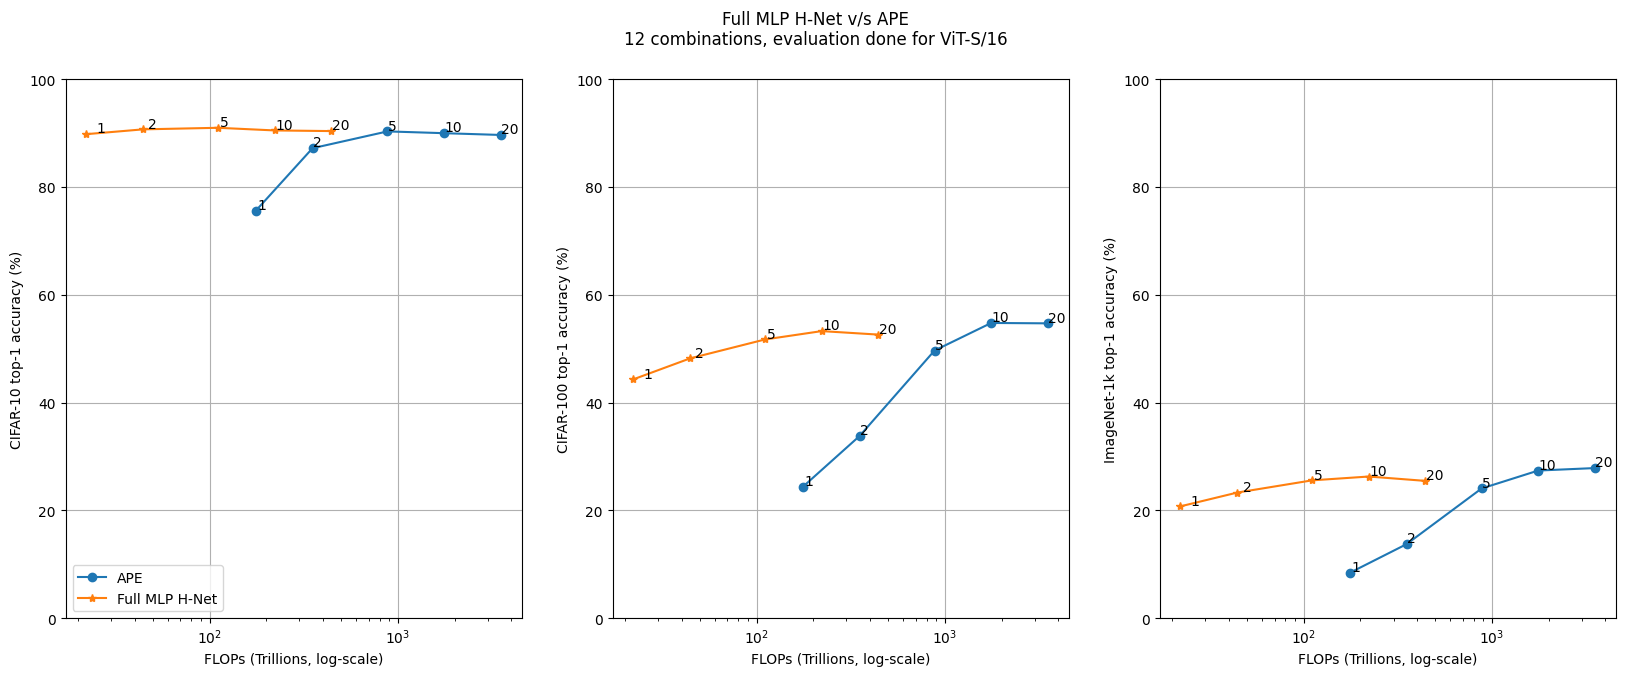

In [19]:
from pylab import plt

hnet = {'exp_name': 'hnet_12-4_fmlp_c-32_bs-512_lr-1e-2', 'seed': 0, 'eval': {'epoch_1': {'cifar10': 89.79, 'cifar100': 44.31, 'imagenet1k': 20.74}, 'epoch_2': {'cifar10': 90.68, 'cifar100': 48.19, 'imagenet1k': 23.29}, 'epoch_5': {'cifar10': 90.97, 'cifar100': 51.7, 'imagenet1k': 25.56}, 'epoch_10': {'cifar10': 90.48, 'cifar100': 53.25, 'imagenet1k': 26.27}, 'epoch_20': {'cifar10': 90.36, 'cifar100': 52.6, 'imagenet1k': 25.46}}}
ape = {'exp_name': 'vit_small_patch16_224_sentence-t5-base', 'seed': 0, 'eval': {'epoch_1': {'cifar10': 75.59, 'cifar100': 24.37, 'imagenet1k': 8.42}, 'epoch_2': {'cifar10': 87.18, 'cifar100': 33.79, 'imagenet1k': 13.73}, 'epoch_5': {'cifar10': 90.3, 'cifar100': 49.64, 'imagenet1k': 24.05}, 'epoch_10': {'cifar10': 89.97, 'cifar100': 54.76, 'imagenet1k': 27.38}, 'epoch_20': {'cifar10': 89.64, 'cifar100': 54.69, 'imagenet1k': 27.84}}}


benchmarks = ["cifar10", "cifar100", "imagenet1k"]
names = {"cifar10": "CIFAR-10", "cifar100": "CIFAR-100", "imagenet1k": "ImageNet-1k"}
lims = {"cifar10": [0, 100.0], "cifar100": [0.0, 100.0], "imagenet1k": [0.0, 100]}
rcs = {"cifar10": 10.0, "cifar100": 1.0, "imagenet1k": 0.1}
epochs = [1, 2, 5, 10, 20]

fig, axes = plt.subplots(1, 3, figsize=(20, 7))

for j, bench in enumerate(benchmarks):
    hnet_accs = [hnet["eval"][f"epoch_{e}"][bench] for e in [1, 2, 5, 10, 20]]
    hnet_flops = [22.165 * e for e in [1, 2, 5, 10, 20]]

    ape_accs = [ape["eval"][f"epoch_{e}"][bench] for e in [1, 2, 5, 10, 20]]
    ape_flops = [14.675 * e * 12 for e in [1, 2, 5, 10, 20]]

    axes[j].plot(ape_flops, ape_accs, label="APE", marker="o")
    axes[j].plot(hnet_flops, hnet_accs, label="Full MLP H-Net", marker="*")
    axes[j].set_xlabel("FLOPs (Trillions, log-scale)")
    axes[j].set_xscale("log")
    axes[j].set_ylabel(f"{names[bench]} top-1 accuracy (%)")
    axes[j].set_ylim(lims[bench])
    
    if j == 0:
        axes[j].legend()
    
    axes[j].grid(True)

    epochs = [1, 2, 5, 10, 20]
    for i, ep in enumerate(epochs):
        axes[j].annotate(f"{ep}", (ape_flops[i] + 3, ape_accs[i] + 0.3))
        axes[j].annotate(f"{ep}", (hnet_flops[i] + 3, hnet_accs[i] + 0.3))

plt.suptitle("Full MLP H-Net v/s APE\n12 combinations, evaluation done for ViT-S/16")

plt.show()


### 4.4 (b): Changing (scale of) text encoders

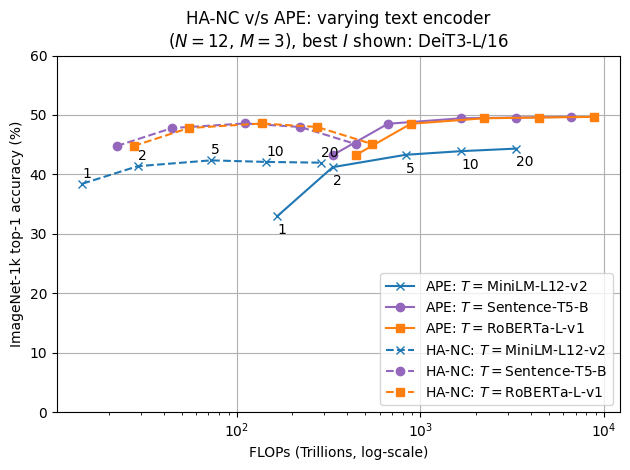

In [19]:
from pylab import plt

# ape_minilm = {'exp_name': 'vit_small_patch16_224_all-MiniLM-L12-v2', 'seed': 0, 'eval': {'epoch_1': {'cifar10': 86.1, 'cifar100': 36.26, 'imagenet1k': 12.41}, 'epoch_2': {'cifar10': 89.33, 'cifar100': 43.29, 'imagenet1k': 17.05}, 'epoch_5': {'cifar10': 89.48, 'cifar100': 46.8, 'imagenet1k': 19.63}, 'epoch_10': {'cifar10': 89.07, 'cifar100': 48.9, 'imagenet1k': 22.84}, 'epoch_20': {'cifar10': 88.62, 'cifar100': 49.27, 'imagenet1k': 23.21}}}
# ape_st5b = {'exp_name': 'vit_small_patch16_224_sentence-t5-base', 'seed': 0, 'eval': {'epoch_1': {'cifar10': 75.59, 'cifar100': 24.37, 'imagenet1k': 8.42}, 'epoch_2': {'cifar10': 87.18, 'cifar100': 33.79, 'imagenet1k': 13.73}, 'epoch_5': {'cifar10': 90.3, 'cifar100': 49.64, 'imagenet1k': 24.05}, 'epoch_10': {'cifar10': 89.97, 'cifar100': 54.76, 'imagenet1k': 27.38}, 'epoch_20': {'cifar10': 89.64, 'cifar100': 54.69, 'imagenet1k': 27.84}}}
# ape_roberta = {'exp_name': 'vit_small_patch16_224_all-roberta-large-v1', 'seed': 0, 'eval': {'epoch_1': {'cifar10': 87.06, 'cifar100': 43.23, 'imagenet1k': 16.61}, 'epoch_2': {'cifar10': 88.56, 'cifar100': 49.4, 'imagenet1k': 22.1}, 'epoch_5': {'cifar10': 89.55, 'cifar100': 51.91, 'imagenet1k': 28.6}, 'epoch_10': {'cifar10': 90.62, 'cifar100': 54.96, 'imagenet1k': 30.21}, 'epoch_20': {'cifar10': 90.02, 'cifar100': 54.89, 'imagenet1k': 30.17}}}

# hnet_minilm = {'exp_name': 'allMiniLM_hnet_12-4_fmlp_c-32_bs-512_lr-1e-2', 'seed': 0, 'eval': {'epoch_1': {'cifar10': 88.85, 'cifar100': 43.99, 'imagenet1k': 19.53}, 'epoch_2': {'cifar10': 89.07, 'cifar100': 46.19, 'imagenet1k': 20.6}, 'epoch_5': {'cifar10': 88.78, 'cifar100': 47.81, 'imagenet1k': 21.34}, 'epoch_10': {'cifar10': 88.0, 'cifar100': 48.2, 'imagenet1k': 21.54}, 'epoch_20': {'cifar10': 87.52, 'cifar100': 48.01, 'imagenet1k': 20.85}}}
# hnet_st5b = {'exp_name': 'hnet_12-4_fmlp_c-32_bs-512_lr-1e-2', 'seed': 0, 'eval': {'epoch_1': {'cifar10': 89.79, 'cifar100': 44.31, 'imagenet1k': 20.74}, 'epoch_2': {'cifar10': 90.68, 'cifar100': 48.19, 'imagenet1k': 23.29}, 'epoch_5': {'cifar10': 90.97, 'cifar100': 51.7, 'imagenet1k': 25.56}, 'epoch_10': {'cifar10': 90.48, 'cifar100': 53.25, 'imagenet1k': 26.27}, 'epoch_20': {'cifar10': 90.36, 'cifar100': 52.6, 'imagenet1k': 25.46}}}
# hnet_roberta = {'exp_name': 'roberta_hnet_12-4_fmlp_c-32_bs-512_lr-1e-2', 'seed': 0, 'eval': {'epoch_1': {'cifar10': 89.69, 'cifar100': 49.36, 'imagenet1k': 25.42}, 'epoch_2': {'cifar10': 90.85, 'cifar100': 51.43, 'imagenet1k': 26.76}, 'epoch_5': {'cifar10': 90.68, 'cifar100': 52.74, 'imagenet1k': 27.68}, 'epoch_10': {'cifar10': 89.5, 'cifar100': 53.51, 'imagenet1k': 28.04}, 'epoch_20': {'cifar10': 89.99, 'cifar100': 52.14, 'imagenet1k': 27.26}}}





hnet_st5b = {'eval': {'epoch_1': {'imagenet1k': 40.76}, 'epoch_2': {'imagenet1k': 46.63}, 'epoch_5': {'imagenet1k': 49.01}, 'epoch_10': {'imagenet1k': 49.37}, 'epoch_20': {'imagenet1k': 49.13}}, 'text_encoder': 'sentence-t5-base', 'encoder_index': 3}
# hnet_st5b = [item["imagenet1k"] for item in hnet_st5b["eval"].values()]

hnet_minilm = {'eval': {'epoch_1': {'imagenet1k': 38.44}, 'epoch_2': {'imagenet1k': 41.38}, 'epoch_5': {'imagenet1k': 42.36}, 'epoch_10': {'imagenet1k': 42.1}, 'epoch_20': {'imagenet1k': 41.97}}, 'text_encoder': 'all-MiniLM-L12-v2', 'encoder_index': 3}
# hnet_minilm = [item["imagenet1k"] for item in hnet_minilm["eval"].values()]

hnet_roberta = {'eval': {'epoch_1': {'imagenet1k': 44.78}, 'epoch_2': {'imagenet1k': 47.8}, 'epoch_5': {'imagenet1k': 48.57}, 'epoch_10': {'imagenet1k': 47.98}, 'epoch_20': {'imagenet1k': 45.1}}, 'text_encoder': 'all-roberta-large-v1', 'encoder_index': 3}
# hnet_roberta = [item["imagenet1k"] for item in hnet_roberta["eval"].values()]

ape_st5b = {'eval': {'epoch_1': {'imagenet1k': 33.0}, 'epoch_2': {'imagenet1k': 41.22}, 'epoch_5': {'imagenet1k': 43.3}, 'epoch_10': {'imagenet1k': 43.91}, 'epoch_20': {'imagenet1k': 44.34}}, 'text_encoder': 'all-MiniLM-L12-v2', 'encoder_index': 3}
# ape_st5b = [item["imagenet1k"] for item in ape_st5b["eval"].values()]

ape_minilm = {'eval': {'epoch_1': {'imagenet1k': 33.0}, 'epoch_2': {'imagenet1k': 41.22}, 'epoch_5': {'imagenet1k': 43.3}, 'epoch_10': {'imagenet1k': 43.91}, 'epoch_20': {'imagenet1k': 44.34}}, 'text_encoder': 'all-MiniLM-L12-v2', 'encoder_index': 3} 
# ape_minilm = [item["imagenet1k"] for item in ape_minilm["eval"].values()]

ape_roberta = {'eval': {'epoch_1': {'imagenet1k': 43.24}, 'epoch_2': {'imagenet1k': 48.52}, 'epoch_5': {'imagenet1k': 49.44}, 'epoch_10': {'imagenet1k': 49.57}, 'epoch_20': {'imagenet1k': 49.68}}, 'text_encoder': 'all-roberta-large-v1', 'encoder_index': 3}
# ape_roberta = [item["imagenet1k"] for item in ape_roberta["eval"].values()]


benchmarks = ["cifar10", "cifar100", "imagenet1k"]
names = {"cifar10": "CIFAR-10", "cifar100": "CIFAR-100", "imagenet1k": "ImageNet-1k"}
lims = {"cifar10": [0, 100.0], "cifar100": [0.0, 100.0], "imagenet1k": [0.0, 60]}
rcs = {"cifar10": 10.0, "cifar100": 1.0, "imagenet1k": 0.1}
epochs = [1, 2, 5, 10, 20]

fig, axes = plt.subplots(1, 1)

for j, bench in enumerate(["imagenet1k"]):
    ape_acc1 = [ape_minilm["eval"][f"epoch_{e}"][bench] for e in epochs]
    ape_flops1 = [
        4 * get_ape_flops(384, 384) * e + \
        4 * get_ape_flops(768, 384) * e + \
        4 * get_ape_flops(1024, 384) * e for e in epochs
    ]    

    ape_acc2 = [ape_st5b["eval"][f"epoch_{e}"][bench] for e in epochs]
    ape_flops2 = [
        4 * get_ape_flops(384, 768) * e + \
        4 * get_ape_flops(768, 768) * e + \
        4 * get_ape_flops(1024, 768) * e for e in epochs
    ]

    ape_acc3 = [ape_roberta["eval"][f"epoch_{e}"][bench] for e in epochs]
    ape_flops3 =  [
        4 * get_ape_flops(384, 1024) * e + \
        4 * get_ape_flops(768, 1024) * e + \
        4 * get_ape_flops(1024, 1024) * e for e in epochs
    ]

    hnet_acc1 = [hnet_minilm["eval"][f"epoch_{e}"][bench] for e in epochs]
    hnet_flops1 = [HNET_FLOPS_12_4_with_384_1ep * e for e in epochs]

    hnet_acc2 = [hnet_st5b["eval"][f"epoch_{e}"][bench] for e in epochs]
    hnet_flops2 = [HNET_FLOPS_12_4_with_768_1ep * e for e in epochs]

    hnet_acc3 = [hnet_roberta["eval"][f"epoch_{e}"][bench] for e in epochs]
    hnet_flops3 = [HNET_FLOPS_12_4_with_1024_1ep * e for e in epochs]

    axes.plot(ape_flops1, ape_acc1, color="tab:blue", marker="x", label="APE: $T=$MiniLM-L12-v2")
    axes.plot(ape_flops2, ape_acc3, color="tab:purple", marker="o", label="APE: $T=$Sentence-T5-B")
    axes.plot(ape_flops3, ape_acc3, color="tab:orange", marker="s", label="APE: $T=$RoBERTa-L-v1")


    axes.plot(hnet_flops1, hnet_acc1, color="tab:blue", linestyle="--", marker="x", label="HA-NC: $T=$MiniLM-L12-v2")
    axes.plot(hnet_flops2, hnet_acc3, color="tab:purple", linestyle="--", marker="o", label="HA-NC: $T=$Sentence-T5-B")
    axes.plot(hnet_flops3, hnet_acc3, color="tab:orange", linestyle="--", marker="s", label="HA-NC: $T=$RoBERTa-L-v1")

    for jj, e in enumerate(epochs):
        ape_flop_list = [ape_flops1, ape_flops2, ape_flops3]
        ape_acc_list = [ape_acc1, ape_acc2, ape_acc3]
        for x, y in zip(ape_flop_list, ape_acc_list):
            axes.annotate(str(e), (x[jj], y[jj] - 3))
            break
        
        hnet_flop_list = [hnet_flops1, hnet_flops2, hnet_flops3]
        hnet_acc_list = [hnet_acc1, hnet_acc2, hnet_acc3]
        for x, y in zip(hnet_flop_list, hnet_acc_list):
            axes.annotate(str(e), (x[jj], y[jj] + 1))
            break
    
    # plt.axhline(rcs[bench], linestyle="--", color="black", label="random chance")

    if j == 0:
        axes.legend(loc="lower right", )
    axes.set_ylim(lims[bench])
    axes.set_ylabel(f"{names[bench]} top-1 accuracy (%)")
    axes.set_xscale("log")
    axes.set_xlabel("FLOPs (Trillions, log-scale)")
    axes.grid(True)

plt.title("HA-NC v/s APE: varying text encoder\n($N=12$, $M=3$), best $I$ shown: DeiT3-L/16")
plt.tight_layout()
plt.savefig("final_plots/vary_te.pdf", dpi=300, format="pdf")
plt.show()



In [6]:
a = 4 * get_ape_flops(384, 384) * 1 + \
    4 * get_ape_flops(768, 384) * 1 + \
    4 * get_ape_flops(1024, 384) * 1
r = HNET_FLOPS_12_4_with_384_1ep / a
1 / r

11.543355543216732

### Changing training dataset scale

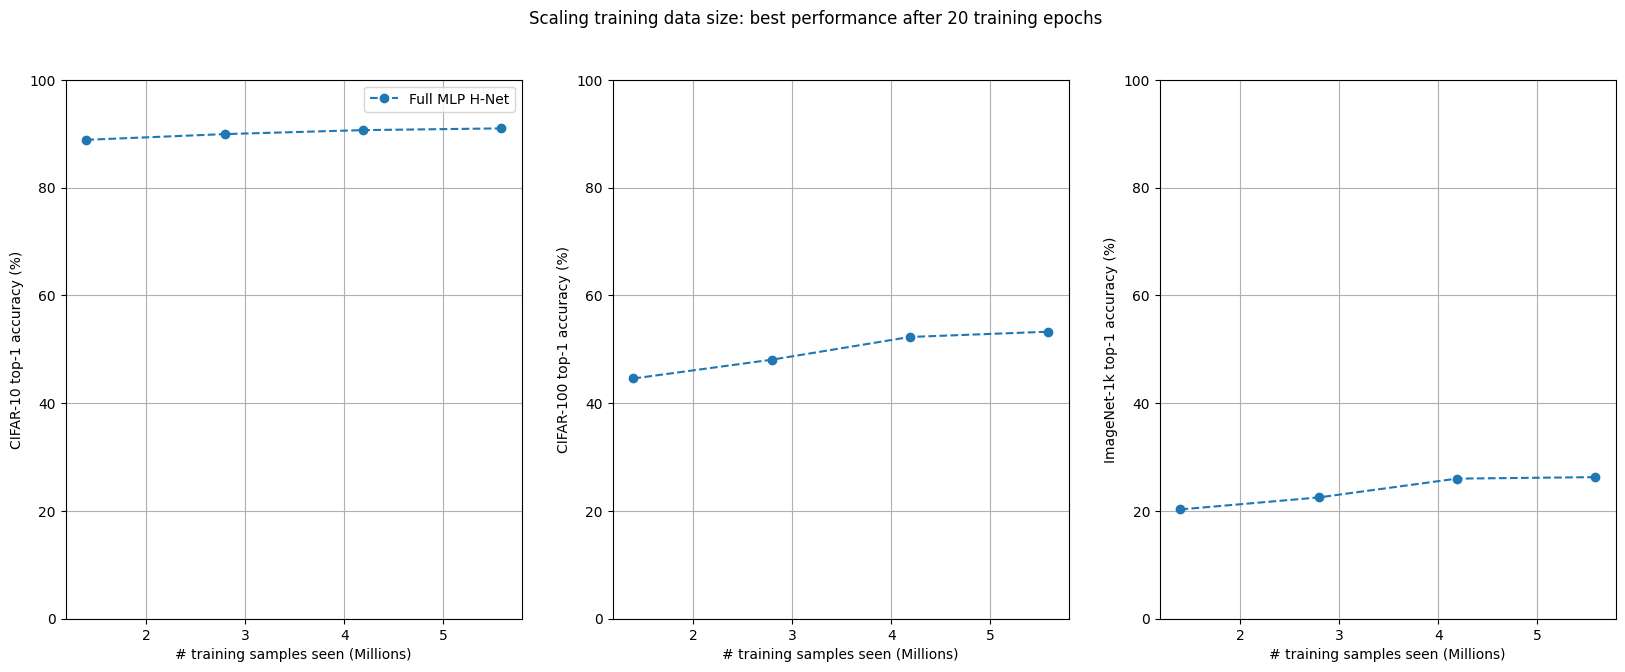

In [28]:

from pylab import plt

ape_full = {'exp_name': 'vit_small_patch16_224_sentence-t5-base', 'seed': 0, 'eval': {'epoch_1': {'cifar10': 75.59, 'cifar100': 24.37, 'imagenet1k': 8.42}, 'epoch_2': {'cifar10': 87.18, 'cifar100': 33.79, 'imagenet1k': 13.73}, 'epoch_5': {'cifar10': 90.3, 'cifar100': 49.64, 'imagenet1k': 24.05}, 'epoch_10': {'cifar10': 89.97, 'cifar100': 54.76, 'imagenet1k': 27.38}, 'epoch_20': {'cifar10': 89.64, 'cifar100': 54.69, 'imagenet1k': 27.84}}}
ape_3_4 = {'exp_name': 'three-fourth_vits_default_ape', 'seed': 0, 'eval': {'epoch_1': {'cifar10': 65.77, 'cifar100': 20.21, 'imagenet1k': 6.51}, 'epoch_2': {'cifar10': 79.38, 'cifar100': 28.03, 'imagenet1k': 10.78}, 'epoch_5': {'cifar10': 89.96, 'cifar100': 44.12, 'imagenet1k': 20.48}, 'epoch_10': {'cifar10': 90.25, 'cifar100': 52.4, 'imagenet1k': 26.04}, 'epoch_20': {'cifar10': 90.14, 'cifar100': 53.99, 'imagenet1k': 27.02}}}
ape_1_2 = {'exp_name': 'half_vits_default_ape', 'seed': 0, 'eval': {'epoch_1': {'cifar10': 60.5, 'cifar100': 17.21, 'imagenet1k': 5.02}, 'epoch_2': {'cifar10': 74.48, 'cifar100': 26.34, 'imagenet1k': 9.49}, 'epoch_5': {'cifar10': 89.71, 'cifar100': 41.33, 'imagenet1k': 18.07}, 'epoch_10': {'cifar10': 90.58, 'cifar100': 50.53, 'imagenet1k': 24.77}, 'epoch_20': {'cifar10': 90.13, 'cifar100': 52.84, 'imagenet1k': 26.35}}}
ape_1_4 = {'exp_name': 'one-fourth_vits_default_ape', 'seed': 0, 'eval': {'epoch_1': {'cifar10': 26.52, 'cifar100': 5.57, 'imagenet1k': 0.57}, 'epoch_2': {'cifar10': 60.6, 'cifar100': 16.56, 'imagenet1k': 4.53}, 'epoch_5': {'cifar10': 81.59, 'cifar100': 29.16, 'imagenet1k': 10.92}, 'epoch_10': {'cifar10': 89.96, 'cifar100': 41.03, 'imagenet1k': 17.92}, 'epoch_20': {'cifar10': 90.14, 'cifar100': 46.05, 'imagenet1k': 21.59}}}

hnet_full = {'exp_name': 'hnet_12-4_fmlp_c-32_bs-512_lr-1e-2', 'seed': 0, 'eval': {'epoch_1': {'cifar10': 89.79, 'cifar100': 44.31, 'imagenet1k': 20.74}, 'epoch_2': {'cifar10': 90.68, 'cifar100': 48.19, 'imagenet1k': 23.29}, 'epoch_5': {'cifar10': 90.97, 'cifar100': 51.7, 'imagenet1k': 25.56}, 'epoch_10': {'cifar10': 90.48, 'cifar100': 53.25, 'imagenet1k': 26.27}, 'epoch_20': {'cifar10': 90.36, 'cifar100': 52.6, 'imagenet1k': 25.46}}}
hnet_3_4 = {'exp_name': 'three-fourth_hnet_12-4_fmlp_c-32_bs-512_lr-1e-2', 'seed': 0, 'eval': {'epoch_1': {'cifar10': 89.63, 'cifar100': 41.48, 'imagenet1k': 18.68}, 'epoch_2': {'cifar10': 90.37, 'cifar100': 46.22, 'imagenet1k': 22.09}, 'epoch_5': {'cifar10': 90.65, 'cifar100': 50.45, 'imagenet1k': 24.78}, 'epoch_10': {'cifar10': 90.31, 'cifar100': 52.27, 'imagenet1k': 25.99}, 'epoch_20': {'cifar10': 7.72, 'cifar100': 2.15, 'imagenet1k': 0.12}}}
hnet_1_2 = {'exp_name': 'half_hnet_12-4_fmlp_c-32_bs-512_lr-1e-2', 'seed': 0, 'eval': {'epoch_1': {'cifar10': 86.9, 'cifar100': 35.39, 'imagenet1k': 13.88}, 'epoch_2': {'cifar10': 89.61, 'cifar100': 43.79, 'imagenet1k': 20.13}, 'epoch_5': {'cifar10': 89.91, 'cifar100': 46.86, 'imagenet1k': 22.34}, 'epoch_10': {'cifar10': 89.6, 'cifar100': 48.05, 'imagenet1k': 22.5}, 'epoch_20': {'cifar10': 7.94, 'cifar100': 1.1, 'imagenet1k': 0.07}}}
hnet_1_4 = {'exp_name': 'one-fourth_hnet_12-4_fmlp_c-32_bs-512_lr-1e-2', 'seed': 0, 'eval': {'epoch_1': {'cifar10': 61.13, 'cifar100': 19.57, 'imagenet1k': 5.13}, 'epoch_2': {'cifar10': 85.89, 'cifar100': 36.12, 'imagenet1k': 14.11}, 'epoch_5': {'cifar10': 88.85, 'cifar100': 43.67, 'imagenet1k': 20.28}, 'epoch_10': {'cifar10': 88.29, 'cifar100': 44.57, 'imagenet1k': 20.13}, 'epoch_20': {'cifar10': 86.8, 'cifar100': 42.98, 'imagenet1k': 18.29}}}

dataset_size = 558128

x_vals = [round(dataset_size * r) * 10 * 1e-6 for r in [0.25, 0.5, 0.75, 1.0]]

fig, axes = plt.subplots(1, 3, figsize=(20, 7))

benchmarks = ["cifar10", "cifar100", "imagenet1k"]
names = {"cifar10": "CIFAR-10", "cifar100": "CIFAR-100", "imagenet1k": "ImageNet-1k"}
lims = {"cifar10": [0, 100.0], "cifar100": [0.0, 100.0], "imagenet1k": [0.0, 100]}
rcs = {"cifar10": 10.0, "cifar100": 1.0, "imagenet1k": 0.1}

for j, bench in enumerate(benchmarks):
    ape = [ [subitem[bench] for subitem in item["eval"].values()] for item in [ape_1_4, ape_1_2, ape_3_4, ape_full] ]
    ape = [max(item) for item in ape]
    hnet = [ [subitem[bench] for subitem in item["eval"].values()] for item in [hnet_1_4, hnet_1_2, hnet_3_4, hnet_full] ]
    hnet = [max(item) for item in hnet]

    # axes[j].plot(x_vals, ape, marker="o", label="APE")
    axes[j].plot(x_vals, hnet, marker="o", linestyle="--", label="Full MLP H-Net")
    axes[j].set_ylim(lims[bench])
    axes[j].set_ylabel(f"{names[bench]} top-1 accuracy (%)")
    axes[j].set_xlabel("# training samples seen (Millions)")
    
    if j == 0:
        axes[j].legend()

    axes[j].grid(True)

plt.suptitle("Scaling training data size: best performance after 20 training epochs")
plt.show()

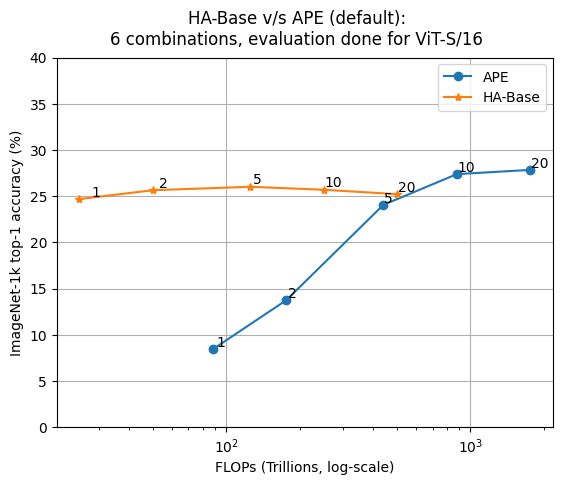

In [57]:
basic_hnet = {'exp_name': 'mm_adapt_test', 'seed': 0, 'eval': {'epoch_1': {'cifar10': 90.78, 'cifar100': 50.96, 'imagenet1k': 24.68}, 'epoch_2': {'cifar10': 90.77, 'cifar100': 52.55, 'imagenet1k': 25.64}, 'epoch_5': {'cifar10': 90.86, 'cifar100': 53.39, 'imagenet1k': 26.01}, 'epoch_10': {'cifar10': 90.49, 'cifar100': 53.27, 'imagenet1k': 25.69}, 'epoch_20': {'cifar10': 90.0, 'cifar100': 52.91, 'imagenet1k': 25.21}}}
ape_full = {'exp_name': 'vit_small_patch16_224_sentence-t5-base', 'seed': 0, 'eval': {'epoch_1': {'cifar10': 75.59, 'cifar100': 24.37, 'imagenet1k': 8.42}, 'epoch_2': {'cifar10': 87.18, 'cifar100': 33.79, 'imagenet1k': 13.73}, 'epoch_5': {'cifar10': 90.3, 'cifar100': 49.64, 'imagenet1k': 24.05}, 'epoch_10': {'cifar10': 89.97, 'cifar100': 54.76, 'imagenet1k': 27.38}, 'epoch_20': {'cifar10': 89.64, 'cifar100': 54.69, 'imagenet1k': 27.84}}}


benchmarks = ["cifar10", "cifar100", "imagenet1k"]
names = {"cifar10": "CIFAR-10", "cifar100": "CIFAR-100", "imagenet1k": "ImageNet-1k"}
lims = {"cifar10": [0, 100.0], "cifar100": [0.0, 100.0], "imagenet1k": [0.0, 100]}
rcs = {"cifar10": 10.0, "cifar100": 1.0, "imagenet1k": 0.1}
epochs = [1, 2, 5, 10, 20]

fig, axes = plt.subplots(1, 1)

for j, bench in enumerate(["imagenet1k"]):
    hnet_accs = [basic_hnet["eval"][f"epoch_{e}"][bench] for e in [1, 2, 5, 10, 20]]
    hnet_flops = [25.06 * e for e in [1, 2, 5, 10, 20]]

    ape_accs = [ape_full["eval"][f"epoch_{e}"][bench] for e in [1, 2, 5, 10, 20]]
    ape_flops = [14.675 * e * 6 for e in [1, 2, 5, 10, 20]]

    axes.plot(ape_flops, ape_accs, label="APE", marker="o")
    axes.plot(hnet_flops, hnet_accs, label="HA-Base", marker="*")
    axes.set_xlabel("FLOPs (Trillions, log-scale)")
    axes.set_xscale("log")
    axes.set_ylabel(f"{names[bench]} top-1 accuracy (%)")
    axes.set_ylim([0, 40])
    # axes.set_title(names[bench])
    
    if j == 0:
        axes.legend()
    
    axes.grid(True)

    epochs = [1, 2, 5, 10, 20]
    for i, ep in enumerate(epochs):
        axes.annotate(f"{ep}", (ape_flops[i] + 3, ape_accs[i] + 0.3))
        axes.annotate(f"{ep}", (hnet_flops[i] + 3, hnet_accs[i] + 0.3))

plt.suptitle("HA-Base v/s APE (default):\n6 combinations, evaluation done for ViT-S/16\n")

# plt.show()
plt.savefig("final_plots/ha_base_vs_ape_6.png", format="png")



### Plot for 4.2

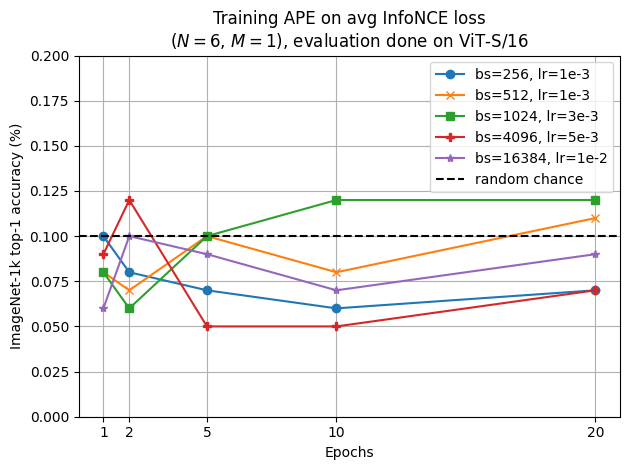

In [101]:
from pylab import plt

data_256 = {'exp_name': 'vits_bs-256_lr-0.001', 'seed': 0, 'eval': {'epoch_1': {'cifar10': 9.56, 'cifar100': 1.0, 'imagenet1k': 0.1}, 'epoch_2': {'cifar10': 11.61, 'cifar100': 0.82, 'imagenet1k': 0.08}, 'epoch_5': {'cifar10': 14.36, 'cifar100': 0.94, 'imagenet1k': 0.07}, 'epoch_10': {'cifar10': 14.54, 'cifar100': 0.75, 'imagenet1k': 0.06}, 'epoch_20': {'cifar10': 15.99, 'cifar100': 0.95, 'imagenet1k': 0.07}}}
data_512 = {'exp_name': 'vits_bs-512_lr-0.001', 'seed': 0, 'eval': {'epoch_1': {'cifar10': 20.42, 'cifar100': 1.3, 'imagenet1k': 0.08}, 'epoch_2': {'cifar10': 17.43, 'cifar100': 1.33, 'imagenet1k': 0.07}, 'epoch_5': {'cifar10': 8.47, 'cifar100': 0.41, 'imagenet1k': 0.1}, 'epoch_10': {'cifar10': 10.83, 'cifar100': 0.69, 'imagenet1k': 0.08}, 'epoch_20': {'cifar10': 12.55, 'cifar100': 1.14, 'imagenet1k': 0.11}}}
data_1024 = {'exp_name': 'vits_bs-1024_lr-0.003', 'seed': 0, 'eval': {'epoch_1': {'cifar10': 7.83, 'cifar100': 1.45, 'imagenet1k': 0.08}, 'epoch_2': {'cifar10': 14.21, 'cifar100': 1.24, 'imagenet1k': 0.06}, 'epoch_5': {'cifar10': 10.36, 'cifar100': 0.97, 'imagenet1k': 0.1}, 'epoch_10': {'cifar10': 10.32, 'cifar100': 1.04, 'imagenet1k': 0.12}, 'epoch_20': {'cifar10': 14.24, 'cifar100': 0.75, 'imagenet1k': 0.12}}}
data_4096 = {'exp_name': 'vits_bs-4096_lr-0.005', 'seed': 0, 'eval': {'epoch_1': {'cifar10': 4.08, 'cifar100': 0.3, 'imagenet1k': 0.09}, 'epoch_2': {'cifar10': 4.93, 'cifar100': 0.37, 'imagenet1k': 0.12}, 'epoch_5': {'cifar10': 10.34, 'cifar100': 0.61, 'imagenet1k': 0.05}, 'epoch_10': {'cifar10': 7.24, 'cifar100': 0.42, 'imagenet1k': 0.05}, 'epoch_20': {'cifar10': 7.05, 'cifar100': 0.6, 'imagenet1k': 0.07}}}
data_16384 = {'exp_name': 'vits_bs-16384_lr-0.001', 'seed': 0, 'eval': {'epoch_1': {'cifar10': 4.41, 'cifar100': 0.84, 'imagenet1k': 0.06}, 'epoch_2': {'cifar10': 5.15, 'cifar100': 0.67, 'imagenet1k': 0.1}, 'epoch_5': {'cifar10': 15.21, 'cifar100': 0.72, 'imagenet1k': 0.09}, 'epoch_10': {'cifar10': 13.72, 'cifar100': 1.26, 'imagenet1k': 0.07}, 'epoch_20': {'cifar10': 13.48, 'cifar100': 1.74, 'imagenet1k': 0.09}}}

epochs = [1, 2, 5, 10, 20]
benchmarks = ["cifar10", "cifar100", "imagenet1k"]
names = {"cifar10": "CIFAR-10", "cifar100": "CIFAR-100", "imagenet1k": "ImageNet-1k"}
lims = {"cifar10": [0.0, 60.0], "cifar100": [0.0, 5.0], "imagenet1k": [0.0, 0.2]}
rcs = {"cifar10": 10.0, "cifar100": 1.0, "imagenet1k": 0.1}

for bench in ["imagenet1k"]:
    acc_256 = [data_256['eval'][f'epoch_{epoch}'][bench] for epoch in epochs]
    acc_512 = [data_512['eval'][f'epoch_{epoch}'][bench] for epoch in epochs]
    acc_1024 = [data_1024['eval'][f'epoch_{epoch}'][bench] for epoch in epochs]
    acc_4096 = [data_4096['eval'][f'epoch_{epoch}'][bench] for epoch in epochs]
    acc_16384 = [data_16384['eval'][f'epoch_{epoch}'][bench] for epoch in epochs]

    # Create the plot
    # plt.figure(figsize=(10, 6))

    plt.plot(epochs, acc_256, marker='o', label="bs=256, lr=1e-3")
    plt.plot(epochs, acc_512, marker='x', label="bs=512, lr=1e-3")
    plt.plot(epochs, acc_1024, marker='s', label="bs=1024, lr=3e-3")
    plt.plot(epochs, acc_4096, marker='P', label="bs=4096, lr=5e-3")
    plt.plot(epochs, acc_16384, marker='*', label="bs=16384, lr=1e-2")

    plt.axhline(y=rcs[bench], color="black", linestyle="--", label="random chance")

    plt.title(f'Training APE on avg InfoNCE loss\n($N=6$, $M=1$), evaluation done on ViT-S/16')
    plt.xlabel('Epochs')
    plt.ylabel(f'{names[bench]} top-1 accuracy (%)')
    plt.ylim(lims[bench])
    plt.xticks([1, 2, 5, 10, 20])
    plt.grid(True)

    # Save and show the plot
    plt.legend()
    plt.tight_layout()
    # plt.show()
    plt.savefig('final_plots/ape_avg_6.pdf', format="pdf")

### Plot for 4.3

In [ ]:
{'vit_small_patch16_224': {'image_encoder': 'vit_small_patch16_224', 'seed': 0, 'eval': {'epoch_1': {'imagenet1k': 25.26}, 'epoch_2': {'imagenet1k': 26.19}, 'epoch_5': {'imagenet1k': 26.72}, 'epoch_10': {'imagenet1k': 26.71}, 'epoch_20': {'imagenet1k': 26.77}}, 'text_encoder': 'sentence-t5-base', 'encoder_index': 0}, 'deit_small_patch16_224': {'image_encoder': 'deit_small_patch16_224', 'seed': 0, 'eval': {'epoch_1': {'imagenet1k': 24.43}, 'epoch_2': {'imagenet1k': 26.21}, 'epoch_5': {'imagenet1k': 27.19}, 'epoch_10': {'imagenet1k': 27.5}, 'epoch_20': {'imagenet1k': 27.01}}, 'text_encoder': 'sentence-t5-base', 'encoder_index': 1}, 'deit3_small_patch16_224.fb_in1k': {'image_encoder': 'deit3_small_patch16_224.fb_in1k', 'seed': 0, 'eval': {'epoch_1': {'imagenet1k': 31.28}, 'epoch_2': {'imagenet1k': 32.94}, 'epoch_5': {'imagenet1k': 33.83}, 'epoch_10': {'imagenet1k': 34.06}, 'epoch_20': {'imagenet1k': 33.17}}, 'text_encoder': 'sentence-t5-base', 'encoder_index': 2}, 'deit3_small_patch16_224.fb_in22k_ft_in1k': {'image_encoder': 'deit3_small_patch16_224.fb_in22k_ft_in1k', 'seed': 0, 'eval': {'epoch_1': {'imagenet1k': 34.81}, 'epoch_2': {'imagenet1k': 36.29}, 'epoch_5': {'imagenet1k': 37.21}, 'epoch_10': {'imagenet1k': 37.49}, 'epoch_20': {'imagenet1k': 37.33}}, 'text_encoder': 'sentence-t5-base', 'encoder_index': 3}, 'efficientvit_m5.r224_in1k': {'image_encoder': 'efficientvit_m5.r224_in1k', 'seed': 0, 'eval': {'epoch_1': {'imagenet1k': 14.78}, 'epoch_2': {'imagenet1k': 17.52}, 'epoch_5': {'imagenet1k': 20.51}, 'epoch_10': {'imagenet1k': 22.12}, 'epoch_20': {'imagenet1k': 22.72}}, 'text_encoder': 'sentence-t5-base', 'encoder_index': 4}, 'flexivit_small.300ep_in1k': {'image_encoder': 'flexivit_small.300ep_in1k', 'seed': 0, 'eval': {'epoch_1': {'imagenet1k': 31.86}, 'epoch_2': {'imagenet1k': 33.39}, 'epoch_5': {'imagenet1k': 34.17}, 'epoch_10': {'imagenet1k': 34.43}, 'epoch_20': {'imagenet1k': 33.94}}, 'text_encoder': 'sentence-t5-base', 'encoder_index': 5}}


In [77]:
import numpy as np

hnet = np.array([
    [25.26, 26.19, 26.72, 26.71, 26.77],  # vit_small_patch16_224
    [24.43, 26.21, 27.19, 27.50, 27.01],  # deit_small_patch16_224
    [31.28, 32.94, 33.83, 34.06, 33.17],  # deit3_small_patch16_224.fb_in1k
    [34.81, 36.29, 37.21, 37.49, 37.33],  # deit3_small_patch16_224.fb_in22k_ft_in1k
    [14.78, 17.52, 20.51, 22.12, 22.72],  # efficientvit_m5.r224_in1k
    [31.86, 33.39, 34.17, 34.43, 33.94]   # flexivit_small.300ep_in1k
])

hnet = hnet[:, 3].argmax(axis=0)  
hnet


np.int64(3)

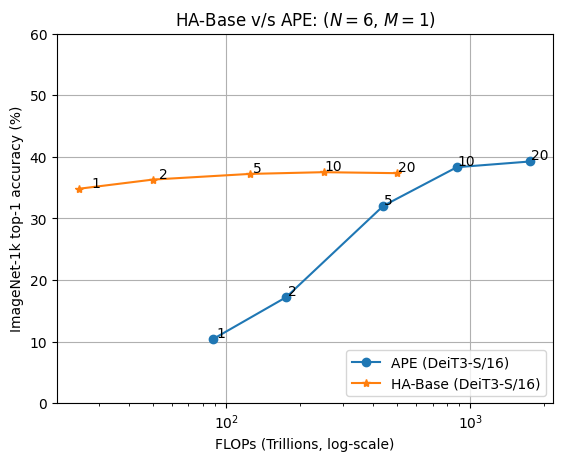

In [4]:
ape_max_data = {'deit3_small_patch16_224.fb_in22k_ft_in1k': {'image_encoder': 'deit3_small_patch16_224.fb_in22k_ft_in1k', 'seed': 0, 'eval': {'epoch_1': {'imagenet1k': 10.37}, 'epoch_2': {'imagenet1k': 17.2}, 'epoch_5': {'imagenet1k': 32.02}, 'epoch_10': {'imagenet1k': 38.3}, 'epoch_20': {'imagenet1k': 39.23}}, 'text_encoder': 'sentence-t5-base', 'encoder_index': 3}}

benchmarks = ["cifar10", "cifar100", "imagenet1k"]
names = {"cifar10": "CIFAR-10", "cifar100": "CIFAR-100", "imagenet1k": "ImageNet-1k"}
lims = {"cifar10": [0, 100.0], "cifar100": [0.0, 100.0], "imagenet1k": [0.0, 100]}
rcs = {"cifar10": 10.0, "cifar100": 1.0, "imagenet1k": 0.1}
epochs = [1, 2, 5, 10, 20]

# fig, axes = plt.subplots(1, 1)

for j, bench in enumerate(["imagenet1k"]):
    hnet_accs = [34.81, 36.29, 37.21, 37.49, 37.33]
    hnet_flops = [25.06 * e for e in [1, 2, 5, 10, 20]]

    ape_accs =[10.37, 17.2, 32.03, 38.3, 39.23]
    ape_flops = [14.675 * e * 6 for e in [1, 2, 5, 10, 20]]

    plt.plot(ape_flops, ape_accs, label="APE (DeiT3-S/16)", marker="o")
    plt.plot(hnet_flops, hnet_accs, label="HA-Base (DeiT3-S/16)", marker="*")
    plt.xlabel("FLOPs (Trillions, log-scale)")
    plt.xscale("log")
    plt.ylabel(f"{names[bench]} top-1 accuracy (%)")
    plt.ylim([0, 60])
    # plt.set_title(names[bench])
    
    if j == 0:
        plt.legend(loc="lower right")
    
    plt.grid(True)

    epochs = [1, 2, 5, 10, 20]
    for i, ep in enumerate(epochs):
        plt.annotate(f"{ep}", (ape_flops[i] + 3, ape_accs[i] + 0.3))
        plt.annotate(f"{ep}", (hnet_flops[i] + 3, hnet_accs[i] + 0.3))

plt.title("HA-Base v/s APE: ($N=6$, $M=1$)")

plt.savefig("final_plots/ha_base_vs_ape_6.pdf", format="pdf")
plt.show()




### Plot for 4.4 (a)

#### $N=12, T=1, B_m=4$

In [48]:
hnet_12_4_1024 = {'vit_large_patch16_224': {'image_encoder': 'vit_large_patch16_224', 'seed': 0, 'eval': {'epoch_1': {'imagenet1k': 29.56}, 'epoch_2': {'imagenet1k': 33.63}, 'epoch_5': {'imagenet1k': 36.73}, 'epoch_10': {'imagenet1k': 37.69}, 'epoch_20': {'imagenet1k': 37.56}}, 'text_encoder': 'sentence-t5-base', 'encoder_index': 0}, 'vit_large_patch16_224.augreg_in21k_ft_in1k': {'image_encoder': 'vit_large_patch16_224.augreg_in21k_ft_in1k', 'seed': 0, 'eval': {'epoch_1': {'imagenet1k': 29.56}, 'epoch_2': {'imagenet1k': 33.63}, 'epoch_5': {'imagenet1k': 36.73}, 'epoch_10': {'imagenet1k': 37.69}, 'epoch_20': {'imagenet1k': 37.56}}, 'text_encoder': 'sentence-t5-base', 'encoder_index': 1}, 'vit_large_patch14_clip_336.laion2b_ft_in12k_in1k': {'image_encoder': 'vit_large_patch14_clip_336.laion2b_ft_in12k_in1k', 'seed': 0, 'eval': {'epoch_1': {'imagenet1k': 33.63}, 'epoch_2': {'imagenet1k': 40.73}, 'epoch_5': {'imagenet1k': 45.19}, 'epoch_10': {'imagenet1k': 46.07}, 'epoch_20': {'imagenet1k': 45.42}}, 'text_encoder': 'sentence-t5-base', 'encoder_index': 2}, 'deit3_large_patch16_384.fb_in22k_ft_in1k': {'image_encoder': 'deit3_large_patch16_384.fb_in22k_ft_in1k', 'seed': 0, 'eval': {'epoch_1': {'imagenet1k': 40.76}, 'epoch_2': {'imagenet1k': 46.63}, 'epoch_5': {'imagenet1k': 49.01}, 'epoch_10': {'imagenet1k': 49.37}, 'epoch_20': {'imagenet1k': 49.13}}, 'text_encoder': 'sentence-t5-base', 'encoder_index': 3}}
hnet_accs = [ [subitem["imagenet1k"] for subitem in item["eval"].values() ] for item in hnet_12_4_1024.values() ]
hnet_accs = hnet_accs[-1]

ape_12_4_1024 = {'deit3_large_patch16_384.fb_in22k_ft_in1k': {'image_encoder': 'deit3_large_patch16_384.fb_in22k_ft_in1k', 'seed': 0, 'eval': {'epoch_1': {'imagenet1k': 30.1}, 'epoch_2': {'imagenet1k': 44.8}, 'epoch_5': {'imagenet1k': 50.22}, 'epoch_10': {'imagenet1k': 50.62}, 'epoch_20': {'imagenet1k': 50.32}}, 'text_encoder': 'sentence-t5-base', 'encoder_index': 3}}
ape_accs = [item["imagenet1k"] for item in ape_12_4_1024["deit3_large_patch16_384.fb_in22k_ft_in1k"]["eval"].values()]

print(hnet_accs)
print(ape_accs)

[40.76, 46.63, 49.01, 49.37, 49.13]
[30.1, 44.8, 50.22, 50.62, 50.32]


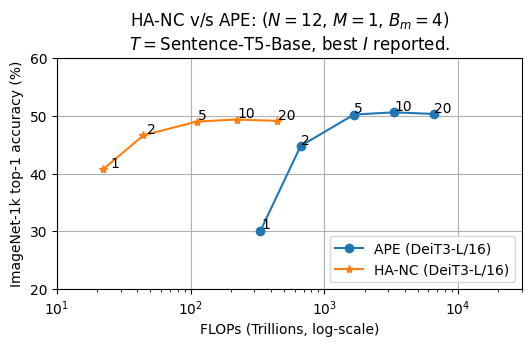

In [49]:
epochs = [1, 2, 5, 10, 20]
ape_flops = [ (4 * 14.675 + 4 * 29.352 + 4 * 39.136) * e for e in epochs]
hnet_flops = [22.165 * e for e in epochs]

plt.figure(figsize=(6, 3))
plt.plot(ape_flops, ape_accs, marker="o", label="APE (DeiT3-L/16)")
plt.plot(hnet_flops, hnet_accs, marker="*", label="HA-NC (DeiT3-L/16)")

# plt.plot(ape_flops, ape_accs, label="APE (DeiT3-S/16)", marker="o")
# plt.plot(hnet_flops, hnet_accs, label="HA-Base (DeiT3-S/16)", marker="*")
plt.xlabel("FLOPs (Trillions, log-scale)")
plt.xscale("log")
plt.ylabel(f"{names[bench]} top-1 accuracy (%)")
plt.ylim([20, 60])
plt.yticks([20, 30, 40, 50, 60])
plt.xlim([10, 3e+4])

if j == 0:
    plt.legend(loc="lower right")

plt.grid(True)

epochs = [1, 2, 5, 10, 20]
for i, ep in enumerate(epochs):
    plt.annotate(f"{ep}", (ape_flops[i] + 3, ape_accs[i] + 0.3))
    plt.annotate(f"{ep}", (hnet_flops[i] + 3, hnet_accs[i] + 0.3))

# plt.title(f"HA-NC v/s APE: ($N=12$, $M=1$)")
plt.title(f"HA-NC v/s APE: ($N=12$, $M=1$, $B_m=4$)\n$T=$Sentence-T5-Base, best $I$ reported.")
plt.show()

#### $N=30, M=1, B_m=10$

In [59]:
data_30_10 = {'vit_large_patch16_224': {'image_encoder': 'vit_large_patch16_224', 'seed': 0, 'eval': {'epoch_1': {'imagenet1k': 29.9}, 'epoch_2': {'imagenet1k': 34.29}, 'epoch_5': {'imagenet1k': 37.33}, 'epoch_10': {'imagenet1k': 37.91}, 'epoch_20': {'imagenet1k': 37.5}}, 'text_encoder': 'sentence-t5-base', 'encoder_index': 0}, 'vit_large_patch16_224.augreg_in21k_ft_in1k': {'image_encoder': 'vit_large_patch16_224.augreg_in21k_ft_in1k', 'seed': 0, 'eval': {'epoch_1': {'imagenet1k': 29.9}, 'epoch_2': {'imagenet1k': 34.29}, 'epoch_5': {'imagenet1k': 37.32}, 'epoch_10': {'imagenet1k': 37.93}, 'epoch_20': {'imagenet1k': 37.51}}, 'text_encoder': 'sentence-t5-base', 'encoder_index': 1}, 'vit_large_patch14_clip_336.laion2b_ft_in12k_in1k': {'image_encoder': 'vit_large_patch14_clip_336.laion2b_ft_in12k_in1k', 'seed': 0, 'eval': {'epoch_1': {'imagenet1k': 36.9}, 'epoch_2': {'imagenet1k': 43.41}, 'epoch_5': {'imagenet1k': 46.17}, 'epoch_10': {'imagenet1k': 46.16}, 'epoch_20': {'imagenet1k': 45.45}}, 'text_encoder': 'sentence-t5-base', 'encoder_index': 2}, 'deit3_large_patch16_384.fb_in22k_ft_in1k': {'image_encoder': 'deit3_large_patch16_384.fb_in22k_ft_in1k', 'seed': 0, 'eval': {'epoch_1': {'imagenet1k': 41.15}, 'epoch_2': {'imagenet1k': 46.5}, 'epoch_5': {'imagenet1k': 49.16}, 'epoch_10': {'imagenet1k': 49.39}, 'epoch_20': {'imagenet1k': 49.01}}, 'text_encoder': 'sentence-t5-base', 'encoder_index': 3}, 'eva02_large_patch14_448.mim_m38m_ft_in22k_in1k': {'image_encoder': 'eva02_large_patch14_448.mim_m38m_ft_in22k_in1k', 'seed': 0, 'eval': {'epoch_1': {'imagenet1k': 41.02}, 'epoch_2': {'imagenet1k': 48.24}, 'epoch_5': {'imagenet1k': 51.7}, 'epoch_10': {'imagenet1k': 52.27}, 'epoch_20': {'imagenet1k': 51.73}}, 'text_encoder': 'sentence-t5-base', 'encoder_index': 4}, 'beit_large_patch16_384.in22k_ft_in22k_in1k': {'image_encoder': 'beit_large_patch16_384.in22k_ft_in22k_in1k', 'seed': 0, 'eval': {'epoch_1': {'imagenet1k': 33.16}, 'epoch_2': {'imagenet1k': 42.17}, 'epoch_5': {'imagenet1k': 45.54}, 'epoch_10': {'imagenet1k': 45.79}, 'epoch_20': {'imagenet1k': 45.87}}, 'text_encoder': 'sentence-t5-base', 'encoder_index': 5}, 'beitv2_large_patch16_224.in1k_ft_in22k_in1k': {'image_encoder': 'beitv2_large_patch16_224.in1k_ft_in22k_in1k', 'seed': 0, 'eval': {'epoch_1': {'imagenet1k': 30.03}, 'epoch_2': {'imagenet1k': 38.4}, 'epoch_5': {'imagenet1k': 42.62}, 'epoch_10': {'imagenet1k': 43.16}, 'epoch_20': {'imagenet1k': 42.89}}, 'text_encoder': 'sentence-t5-base', 'encoder_index': 6}, 'swin_base_patch4_window7_224.ms_in22k_ft_in1k': {'image_encoder': 'swin_base_patch4_window7_224.ms_in22k_ft_in1k', 'seed': 0, 'eval': {'epoch_1': {'imagenet1k': 25.74}, 'epoch_2': {'imagenet1k': 31.95}, 'epoch_5': {'imagenet1k': 36.17}, 'epoch_10': {'imagenet1k': 37.31}, 'epoch_20': {'imagenet1k': 37.43}}, 'text_encoder': 'sentence-t5-base', 'encoder_index': 7}, 'convnext_base.fb_in22k_ft_in1k': {'image_encoder': 'convnext_base.fb_in22k_ft_in1k', 'seed': 0, 'eval': {'epoch_1': {'imagenet1k': 31.11}, 'epoch_2': {'imagenet1k': 37.13}, 'epoch_5': {'imagenet1k': 40.13}, 'epoch_10': {'imagenet1k': 41.01}, 'epoch_20': {'imagenet1k': 40.68}}, 'text_encoder': 'sentence-t5-base', 'encoder_index': 8}, 'convnextv2_base.fcmae_ft_in22k_in1k': {'image_encoder': 'convnextv2_base.fcmae_ft_in22k_in1k', 'seed': 0, 'eval': {'epoch_1': {'imagenet1k': 31.25}, 'epoch_2': {'imagenet1k': 38.45}, 'epoch_5': {'imagenet1k': 41.95}, 'epoch_10': {'imagenet1k': 42.94}, 'epoch_20': {'imagenet1k': 42.13}}, 'text_encoder': 'sentence-t5-base', 'encoder_index': 9}}
mat_30_10 = [ [subitem["imagenet1k"] for subitem in v["eval"].values()] for v in data_30_10.values() ]
for item in mat_30_10:
    print(item)


[29.9, 34.29, 37.33, 37.91, 37.5]
[29.9, 34.29, 37.32, 37.93, 37.51]
[36.9, 43.41, 46.17, 46.16, 45.45]
[41.15, 46.5, 49.16, 49.39, 49.01]
[41.02, 48.24, 51.7, 52.27, 51.73]
[33.16, 42.17, 45.54, 45.79, 45.87]
[30.03, 38.4, 42.62, 43.16, 42.89]
[25.74, 31.95, 36.17, 37.31, 37.43]
[31.11, 37.13, 40.13, 41.01, 40.68]
[31.25, 38.45, 41.95, 42.94, 42.13]


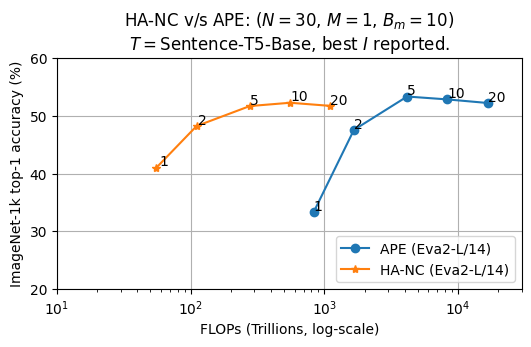

In [60]:
epochs = [1, 2, 5, 10, 20]
ape_flops = [
    10 * get_ape_flops(384, 768) * e + \
    10 * get_ape_flops(768, 768) * e + \
    10 * get_ape_flops(1024, 768) * e for e in epochs
]
ape_accs = {'eval': {'epoch_1': {'imagenet1k': 33.33}, 'epoch_2': {'imagenet1k': 47.57}, 'epoch_5': {'imagenet1k': 53.35}, 'epoch_10': {'imagenet1k': 52.85}, 'epoch_20': {'imagenet1k': 52.23}}, 'text_encoder': 'sentence-t5-base', 'encoder_index': 4}
ape_accs = [item["imagenet1k"] for item in ape_accs["eval"].values()]

hnet_accs = [41.02, 48.24, 51.7, 52.27, 51.73]
hnet_flops = [HNET_FLOPS_30_10_with_768_1ep * e for e in epochs]

plt.figure(figsize=(6, 3))
plt.plot(ape_flops, ape_accs, marker="o", label="APE (Eva2-L/14)")
plt.plot(hnet_flops, hnet_accs, marker="*", label="HA-NC (Eva2-L/14)")

plt.xlabel("FLOPs (Trillions, log-scale)")
plt.xscale("log")
plt.ylabel(f"{names[bench]} top-1 accuracy (%)")
plt.ylim([20, 60])
plt.yticks([20, 30, 40, 50, 60])
plt.xlim([10, 3e+4])

if j == 0:
    plt.legend(loc="lower right")

plt.grid(True)

epochs = [1, 2, 5, 10, 20]
for i, ep in enumerate(epochs):
    plt.annotate(f"{ep}", (ape_flops[i] + 3, ape_accs[i] + 0.3))
    plt.annotate(f"{ep}", (hnet_flops[i] + 3, hnet_accs[i] + 0.3))

plt.title(f"HA-NC v/s APE: ($N=30$, $M=1$, $B_m=10$)\n$T=$Sentence-T5-Base, best $I$ reported.")
plt.show()

#### $N=18, M=1, B_m=6$

In [55]:
hnet_18_6 = {'vit_large_patch16_224': {'image_encoder': 'vit_large_patch16_224', 'seed': 0, 'eval': {'epoch_1': {'imagenet1k': 30.16}, 'epoch_2': {'imagenet1k': 34.7}, 'epoch_5': {'imagenet1k': 37.51}, 'epoch_10': {'imagenet1k': 37.85}, 'epoch_20': {'imagenet1k': 37.73}}, 'text_encoder': 'sentence-t5-base', 'encoder_index': 0}, 'vit_large_patch16_224.augreg_in21k_ft_in1k': {'image_encoder': 'vit_large_patch16_224.augreg_in21k_ft_in1k', 'seed': 0, 'eval': {'epoch_1': {'imagenet1k': 30.17}, 'epoch_2': {'imagenet1k': 34.69}, 'epoch_5': {'imagenet1k': 37.5}, 'epoch_10': {'imagenet1k': 37.86}, 'epoch_20': {'imagenet1k': 37.71}}, 'text_encoder': 'sentence-t5-base', 'encoder_index': 1}, 'vit_large_patch14_clip_336.laion2b_ft_in12k_in1k': {'image_encoder': 'vit_large_patch14_clip_336.laion2b_ft_in12k_in1k', 'seed': 0, 'eval': {'epoch_1': {'imagenet1k': 39.01}, 'epoch_2': {'imagenet1k': 43.96}, 'epoch_5': {'imagenet1k': 46.3}, 'epoch_10': {'imagenet1k': 46.31}, 'epoch_20': {'imagenet1k': 45.64}}, 'text_encoder': 'sentence-t5-base', 'encoder_index': 2}, 'deit3_large_patch16_384.fb_in22k_ft_in1k': {'image_encoder': 'deit3_large_patch16_384.fb_in22k_ft_in1k', 'seed': 0, 'eval': {'epoch_1': {'imagenet1k': 41.74}, 'epoch_2': {'imagenet1k': 47.01}, 'epoch_5': {'imagenet1k': 49.42}, 'epoch_10': {'imagenet1k': 49.45}, 'epoch_20': {'imagenet1k': 48.97}}, 'text_encoder': 'sentence-t5-base', 'encoder_index': 3}, 'eva02_large_patch14_448.mim_m38m_ft_in22k_in1k': {'image_encoder': 'eva02_large_patch14_448.mim_m38m_ft_in22k_in1k', 'seed': 0, 'eval': {'epoch_1': {'imagenet1k': 42.83}, 'epoch_2': {'imagenet1k': 49.16}, 'epoch_5': {'imagenet1k': 51.83}, 'epoch_10': {'imagenet1k': 52.18}, 'epoch_20': {'imagenet1k': 51.65}}, 'text_encoder': 'sentence-t5-base', 'encoder_index': 4}, 'beit_large_patch16_384.in22k_ft_in22k_in1k': {'image_encoder': 'beit_large_patch16_384.in22k_ft_in22k_in1k', 'seed': 0, 'eval': {'epoch_1': {'imagenet1k': 36.79}, 'epoch_2': {'imagenet1k': 42.54}, 'epoch_5': {'imagenet1k': 45.25}, 'epoch_10': {'imagenet1k': 45.57}, 'epoch_20': {'imagenet1k': 45.69}}, 'text_encoder': 'sentence-t5-base', 'encoder_index': 5}}
mat_18_6 = [ [subitem["imagenet1k"] for subitem in v["eval"].values()] for v in hnet_18_6.values() ]
for item in mat_18_6:
    print(item)

[30.16, 34.7, 37.51, 37.85, 37.73]
[30.17, 34.69, 37.5, 37.86, 37.71]
[39.01, 43.96, 46.3, 46.31, 45.64]
[41.74, 47.01, 49.42, 49.45, 48.97]
[42.83, 49.16, 51.83, 52.18, 51.65]
[36.79, 42.54, 45.25, 45.57, 45.69]


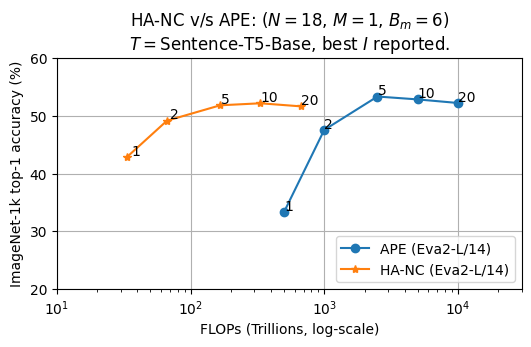

In [56]:
epochs = [1, 2, 5, 10, 20]
ape_flops = [
    6 * get_ape_flops(384, 768) * e + \
    6 * get_ape_flops(768, 768) * e + \
    6 * get_ape_flops(1024, 768) * e for e in epochs
]
ape_accs = {'eval': {'epoch_1': {'imagenet1k': 33.33}, 'epoch_2': {'imagenet1k': 47.57}, 'epoch_5': {'imagenet1k': 53.35}, 'epoch_10': {'imagenet1k': 52.85}, 'epoch_20': {'imagenet1k': 52.23}}, 'text_encoder': 'sentence-t5-base', 'encoder_index': 4}
ape_accs = [item["imagenet1k"] for item in ape_accs["eval"].values()]

hnet_accs =  [42.83, 49.16, 51.83, 52.18, 51.65] #[41.02, 48.24, 51.7, 52.27, 51.73]
hnet_flops = [HNET_FLOPS_18_6_with_768_1ep * e for e in epochs]

plt.figure(figsize=(6, 3))
plt.plot(ape_flops, ape_accs, marker="o", label="APE (Eva2-L/14)")
plt.plot(hnet_flops, hnet_accs, marker="*", label="HA-NC (Eva2-L/14)")

plt.xlabel("FLOPs (Trillions, log-scale)")
plt.xscale("log")
plt.ylabel(f"{names[bench]} top-1 accuracy (%)")
plt.ylim([20, 60])
plt.yticks([20, 30, 40, 50, 60])
plt.xlim([10, 3e+4])

if j == 0:
    plt.legend(loc="lower right")

plt.grid(True)

epochs = [1, 2, 5, 10, 20]
for i, ep in enumerate(epochs):
    plt.annotate(f"{ep}", (ape_flops[i] + 3, ape_accs[i] + 0.3))
    plt.annotate(f"{ep}", (hnet_flops[i] + 3, hnet_accs[i] + 0.3))

plt.title(f"HA-NC v/s APE: ($N=18$, $M=1$, $B_m=6$)\n$T=$Sentence-T5-Base, best $I$ reported.")
plt.show()

#### $N=24, M=1, B_m=8$

In [57]:
hnet_24_8 = {'vit_large_patch16_224': {'image_encoder': 'vit_large_patch16_224', 'seed': 0, 'eval': {'epoch_1': {'imagenet1k': 29.95}, 'epoch_2': {'imagenet1k': 34.37}, 'epoch_5': {'imagenet1k': 37.44}, 'epoch_10': {'imagenet1k': 37.85}, 'epoch_20': {'imagenet1k': 0.1}}, 'text_encoder': 'sentence-t5-base', 'encoder_index': 0}, 'vit_large_patch16_224.augreg_in21k_ft_in1k': {'image_encoder': 'vit_large_patch16_224.augreg_in21k_ft_in1k', 'seed': 0, 'eval': {'epoch_1': {'imagenet1k': 29.95}, 'epoch_2': {'imagenet1k': 34.38}, 'epoch_5': {'imagenet1k': 37.43}, 'epoch_10': {'imagenet1k': 37.88}, 'epoch_20': {'imagenet1k': 0.1}}, 'text_encoder': 'sentence-t5-base', 'encoder_index': 1}, 'vit_large_patch14_clip_336.laion2b_ft_in12k_in1k': {'image_encoder': 'vit_large_patch14_clip_336.laion2b_ft_in12k_in1k', 'seed': 0, 'eval': {'epoch_1': {'imagenet1k': 35.5}, 'epoch_2': {'imagenet1k': 42.99}, 'epoch_5': {'imagenet1k': 46.08}, 'epoch_10': {'imagenet1k': 46.12}, 'epoch_20': {'imagenet1k': 0.1}}, 'text_encoder': 'sentence-t5-base', 'encoder_index': 2}, 'deit3_large_patch16_384.fb_in22k_ft_in1k': {'image_encoder': 'deit3_large_patch16_384.fb_in22k_ft_in1k', 'seed': 0, 'eval': {'epoch_1': {'imagenet1k': 40.76}, 'epoch_2': {'imagenet1k': 46.29}, 'epoch_5': {'imagenet1k': 49.01}, 'epoch_10': {'imagenet1k': 49.25}, 'epoch_20': {'imagenet1k': 0.1}}, 'text_encoder': 'sentence-t5-base', 'encoder_index': 3}, 'eva02_large_patch14_448.mim_m38m_ft_in22k_in1k': {'image_encoder': 'eva02_large_patch14_448.mim_m38m_ft_in22k_in1k', 'seed': 0, 'eval': {'epoch_1': {'imagenet1k': 39.5}, 'epoch_2': {'imagenet1k': 48.06}, 'epoch_5': {'imagenet1k': 51.81}, 'epoch_10': {'imagenet1k': 52.42}, 'epoch_20': {'imagenet1k': 0.1}}, 'text_encoder': 'sentence-t5-base', 'encoder_index': 4}, 'beit_large_patch16_384.in22k_ft_in22k_in1k': {'image_encoder': 'beit_large_patch16_384.in22k_ft_in22k_in1k', 'seed': 0, 'eval': {'epoch_1': {'imagenet1k': 35.58}, 'epoch_2': {'imagenet1k': 42.28}, 'epoch_5': {'imagenet1k': 45.23}, 'epoch_10': {'imagenet1k': 45.63}, 'epoch_20': {'imagenet1k': 0.1}}, 'text_encoder': 'sentence-t5-base', 'encoder_index': 5}, 'beitv2_large_patch16_224.in1k_ft_in22k_in1k': {'image_encoder': 'beitv2_large_patch16_224.in1k_ft_in22k_in1k', 'seed': 0, 'eval': {'epoch_1': {'imagenet1k': 29.14}, 'epoch_2': {'imagenet1k': 38.17}, 'epoch_5': {'imagenet1k': 42.97}, 'epoch_10': {'imagenet1k': 43.54}, 'epoch_20': {'imagenet1k': 0.1}}, 'text_encoder': 'sentence-t5-base', 'encoder_index': 6}, 'swin_base_patch4_window7_224.ms_in22k_ft_in1k': {'image_encoder': 'swin_base_patch4_window7_224.ms_in22k_ft_in1k', 'seed': 0, 'eval': {'epoch_1': {'imagenet1k': 24.56}, 'epoch_2': {'imagenet1k': 31.85}, 'epoch_5': {'imagenet1k': 36.12}, 'epoch_10': {'imagenet1k': 37.35}, 'epoch_20': {'imagenet1k': 0.1}}, 'text_encoder': 'sentence-t5-base', 'encoder_index': 7}} 
mat_24_8 = [ [subitem["imagenet1k"] for subitem in v["eval"].values()] for v in hnet_24_8.values() ]
for item in mat_24_8:
    print(item)

[29.95, 34.37, 37.44, 37.85, 0.1]
[29.95, 34.38, 37.43, 37.88, 0.1]
[35.5, 42.99, 46.08, 46.12, 0.1]
[40.76, 46.29, 49.01, 49.25, 0.1]
[39.5, 48.06, 51.81, 52.42, 0.1]
[35.58, 42.28, 45.23, 45.63, 0.1]
[29.14, 38.17, 42.97, 43.54, 0.1]
[24.56, 31.85, 36.12, 37.35, 0.1]


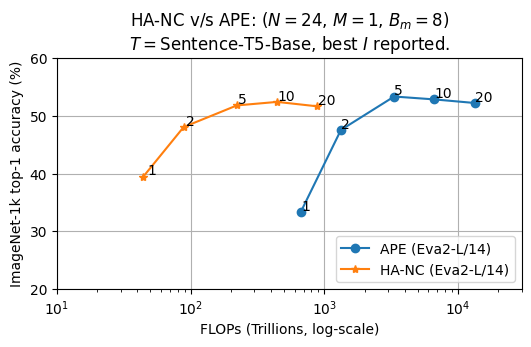

In [58]:
epochs = [1, 2, 5, 10, 20]
ape_flops = [
    8 * get_ape_flops(384, 768) * e + \
    8 * get_ape_flops(768, 768) * e + \
    8 * get_ape_flops(1024, 768) * e for e in epochs
]
ape_accs = {'eval': {'epoch_1': {'imagenet1k': 33.33}, 'epoch_2': {'imagenet1k': 47.57}, 'epoch_5': {'imagenet1k': 53.35}, 'epoch_10': {'imagenet1k': 52.85}, 'epoch_20': {'imagenet1k': 52.23}}, 'text_encoder': 'sentence-t5-base', 'encoder_index': 4}
ape_accs = [item["imagenet1k"] for item in ape_accs["eval"].values()]

hnet_accs = [39.5, 48.06, 51.81, 52.42, 51.65]
hnet_flops = [HNET_FLOPS_24_8_with_768_1ep * e for e in epochs]

plt.figure(figsize=(6, 3))
plt.plot(ape_flops, ape_accs, marker="o", label="APE (Eva2-L/14)")
plt.plot(hnet_flops, hnet_accs, marker="*", label="HA-NC (Eva2-L/14)")

plt.xlabel("FLOPs (Trillions, log-scale)")
plt.xscale("log")
plt.ylabel(f"{names[bench]} top-1 accuracy (%)")
plt.ylim([20, 60])
plt.yticks([20, 30, 40, 50, 60])
plt.xlim([10, 3e+4])

if j == 0:
    plt.legend(loc="lower right")

plt.grid(True)

epochs = [1, 2, 5, 10, 20]
for i, ep in enumerate(epochs):
    plt.annotate(f"{ep}", (ape_flops[i] + 3, ape_accs[i] + 0.3))
    plt.annotate(f"{ep}", (hnet_flops[i] + 3, hnet_accs[i] + 0.3))

plt.title(f"HA-NC v/s APE: ($N=24$, $M=1$, $B_m=8$)\n$T=$Sentence-T5-Base, best $I$ reported.")
plt.show()

### Plot for 4.5

#### Chunked $N=12, M=1, B_m=4, d_{chk}=256$

In [16]:
hnet_12_4_chk = {'eval': {'epoch_1': {'imagenet1k': 18.51}, 'epoch_2': {'imagenet1k': 25.54}, 'epoch_5': {'imagenet1k': 32.36}, 'epoch_10': {'imagenet1k': 35.79}, 'epoch_20': {'imagenet1k': 37.85}}, 'text_encoder': 'sentence-t5-base', 'encoder_index': 3}
hnet_accs = [item["imagenet1k"] for item in hnet_12_4_chk["eval"].values()]
print(hnet_accs)

ape_12_4_chk = {'deit3_large_patch16_384.fb_in22k_ft_in1k': {'image_encoder': 'deit3_large_patch16_384.fb_in22k_ft_in1k', 'seed': 0, 'eval': {'epoch_1': {'imagenet1k': 30.1}, 'epoch_2': {'imagenet1k': 44.8}, 'epoch_5': {'imagenet1k': 50.22}, 'epoch_10': {'imagenet1k': 50.62}, 'epoch_20': {'imagenet1k': 50.32}}, 'text_encoder': 'sentence-t5-base', 'encoder_index': 3}}
ape_accs = [item["imagenet1k"] for item in ape_12_4_chk["deit3_large_patch16_384.fb_in22k_ft_in1k"]["eval"].values()]
print(ape_accs)


[18.51, 25.54, 32.36, 35.79, 37.85]
[30.1, 44.8, 50.22, 50.62, 50.32]


In [17]:
hnet_12_4_nc = {'vit_large_patch16_224': {'image_encoder': 'vit_large_patch16_224', 'seed': 0, 'eval': {'epoch_1': {'imagenet1k': 29.56}, 'epoch_2': {'imagenet1k': 33.63}, 'epoch_5': {'imagenet1k': 36.73}, 'epoch_10': {'imagenet1k': 37.69}, 'epoch_20': {'imagenet1k': 37.56}}, 'text_encoder': 'sentence-t5-base', 'encoder_index': 0}, 'vit_large_patch16_224.augreg_in21k_ft_in1k': {'image_encoder': 'vit_large_patch16_224.augreg_in21k_ft_in1k', 'seed': 0, 'eval': {'epoch_1': {'imagenet1k': 29.56}, 'epoch_2': {'imagenet1k': 33.63}, 'epoch_5': {'imagenet1k': 36.73}, 'epoch_10': {'imagenet1k': 37.69}, 'epoch_20': {'imagenet1k': 37.56}}, 'text_encoder': 'sentence-t5-base', 'encoder_index': 1}, 'vit_large_patch14_clip_336.laion2b_ft_in12k_in1k': {'image_encoder': 'vit_large_patch14_clip_336.laion2b_ft_in12k_in1k', 'seed': 0, 'eval': {'epoch_1': {'imagenet1k': 33.63}, 'epoch_2': {'imagenet1k': 40.73}, 'epoch_5': {'imagenet1k': 45.19}, 'epoch_10': {'imagenet1k': 46.07}, 'epoch_20': {'imagenet1k': 45.42}}, 'text_encoder': 'sentence-t5-base', 'encoder_index': 2}, 'deit3_large_patch16_384.fb_in22k_ft_in1k': {'image_encoder': 'deit3_large_patch16_384.fb_in22k_ft_in1k', 'seed': 0, 'eval': {'epoch_1': {'imagenet1k': 40.76}, 'epoch_2': {'imagenet1k': 46.63}, 'epoch_5': {'imagenet1k': 49.01}, 'epoch_10': {'imagenet1k': 49.37}, 'epoch_20': {'imagenet1k': 49.13}}, 'text_encoder': 'sentence-t5-base', 'encoder_index': 3}}
hnet_accs_nc = [ [subitem["imagenet1k"] for subitem in item["eval"].values() ] for item in hnet_12_4_nc.values() ]
hnet_accs_nc = hnet_accs_nc[-1]

# ape_12_4_nc = {'deit3_large_patch16_384.fb_in22k_ft_in1k': {'image_encoder': 'deit3_large_patch16_384.fb_in22k_ft_in1k', 'seed': 0, 'eval': {'epoch_1': {'imagenet1k': 30.1}, 'epoch_2': {'imagenet1k': 44.8}, 'epoch_5': {'imagenet1k': 50.22}, 'epoch_10': {'imagenet1k': 50.62}, 'epoch_20': {'imagenet1k': 50.32}}, 'text_encoder': 'sentence-t5-base', 'encoder_index': 3}}
# ape_accs = [item["imagenet1k"] for item in ape_12_4_1024["deit3_large_patch16_384.fb_in22k_ft_in1k"]["eval"].values()]

print(hnet_accs_nc)
# print(ape_accs)

[40.76, 46.63, 49.01, 49.37, 49.13]


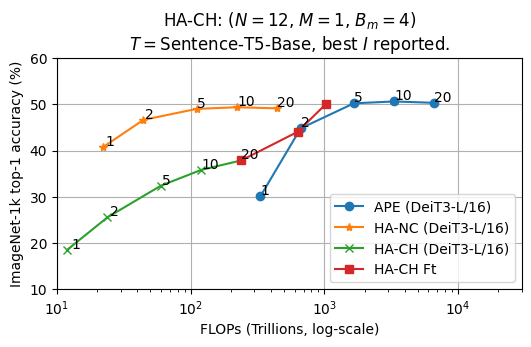

In [18]:
from pylab import plt

epochs = [1, 2, 5, 10, 20]
ape_flops = [ (4 * get_ape_flops(384, 768) + 4 * get_ape_flops(768, 768) + 4 * get_ape_flops(1024, 768)) * e for e in epochs]
hnet_flops = [CHKNET_FLOPS_12_4_with_768_1ep * e for e in epochs]
hnet_flops_nc = [HNET_FLOPS_12_4_with_768_1ep * e for e in epochs]
names = {"cifar10": "CIFAR-10", "cifar100": "CIFAR-100", "imagenet1k": "ImageNet-1k"}
bench = "imagenet1k"
plt.figure(figsize=(6, 3))
plt.plot(ape_flops, ape_accs, marker="o", label="APE (DeiT3-L/16)")
plt.plot(hnet_flops_nc, hnet_accs_nc, marker="*", label="HA-NC (DeiT3-L/16)")
plt.plot(hnet_flops, hnet_accs, marker="x", label="HA-CH (DeiT3-L/16)")

ft_hnet_ch_acc = [hnet_accs[-1], 44.03, 50]
ft_hnet_ch_flops = [hnet_flops[-1], hnet_flops[-1] + 10 * get_ape_flops(1024, 768), hnet_flops[-1] + 20 * get_ape_flops(1024, 768)]

plt.plot(ft_hnet_ch_flops, ft_hnet_ch_acc, marker="s", label="HA-CH Ft")

plt.xlabel("FLOPs (Trillions, log-scale)")
plt.xscale("log")
plt.ylabel(f"{names[bench]} top-1 accuracy (%)")
plt.ylim([10, 60])
plt.yticks([10, 20, 30, 40, 50, 60])
plt.xlim([10, 3e+4])

# if j == 0:
plt.legend(loc="lower right")

plt.grid(True)

epochs = [1, 2, 5, 10, 20]
for i, ep in enumerate(epochs):
    plt.annotate(f"{ep}", (ape_flops[i] + 1, ape_accs[i] + 0.3))
    plt.annotate(f"{ep}", (hnet_flops[i] + 1, hnet_accs[i] + 0.3))
    plt.annotate(f"{ep}", (hnet_flops_nc[i] + 1, hnet_accs_nc[i] + 0.3))

# plt.title(f"HA-NC v/s APE: ($N=12$, $M=1$)")
plt.title(f"HA-CH: ($N=12$, $M=1$, $B_m=4$)\n$T=$Sentence-T5-Base, best $I$ reported.")
plt.savefig("final_plots/chk_12_4.pdf", dpi=300, format="pdf")
plt.show()

### CKA for OOD

/var/folders/76/k9dkfmf92q19jtdmr7qd_nh00000gn/T/ipykernel_35329/1760421402.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  cka_data = torch.load("ckas_id_ood.pt")


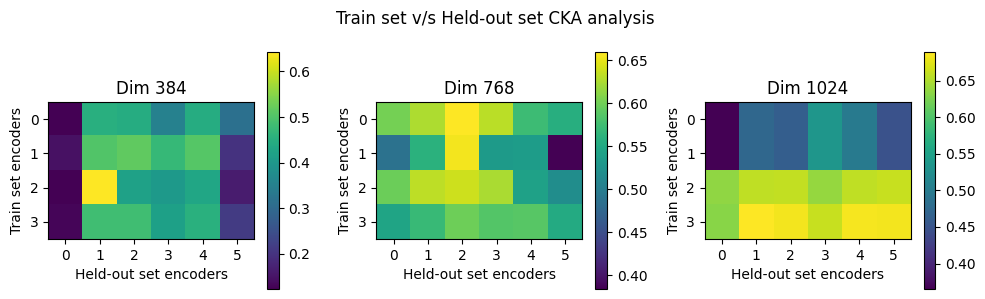

In [ ]:
import torch
cka_data = torch.load("ckas_id_ood.pt")

fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for i, dim in enumerate([384, 768, 1024]):
    im = axes[i].imshow(cka_data[dim]["linear"].numpy())
    axes[i].set_yticks([0, 1, 2, 3])
    axes[i].set_xticks([0, 1, 2, 3, 4, 5])
    axes[i].set_ylabel("Train set encoders")
    axes[i].set_xlabel("Held-out set encoders")
    axes[i].set_title(f"Dim {dim}")
    plt.colorbar(im, ax=axes[i])
    # tmp = axes[0]
    
plt.suptitle("Train set v/s Held-out set CKA analysis")
plt.tight_layout()    
plt.show()

### Eva2 hnet_30_10 on image-text matching

- Flickr8k : {'R@1': 13.988382153009516, 'R@5': 31.096279817080706, 'R@10': 40.51167964404894}
- MSCOCO : 
    - vit_large_patch16_224 = {'R@1': 18.316000000000003, 'R@5': 39.948, 'R@10': 51.74400000000001}
    - vit_large_patch16_224_clip_ft = {'R@1': 15.844, 'R@5': 35.94, 'R@10': 47.41600000000001} 
    - deit3_large_patch16_384 = {'R@1': 14.116, 'R@5': 32.624, 'R@10': 43.739999999999995}
    - eva02_large_patch14_448 = {'R@1': 16.648, 'R@5': 36.644000000000005, 'R@10': 47.952}
    - 

### (Trash) - Plot for 4.4 (b)

In [2]:
# deit3_large_patch16_384.fb_in22k_ft_in1k
hnet_st5b = {'eval': {'epoch_1': {'imagenet1k': 40.76}, 'epoch_2': {'imagenet1k': 46.63}, 'epoch_5': {'imagenet1k': 49.01}, 'epoch_10': {'imagenet1k': 49.37}, 'epoch_20': {'imagenet1k': 49.13}}, 'text_encoder': 'sentence-t5-base', 'encoder_index': 3}
hnet_st5b = [item["imagenet1k"] for item in hnet_st5b["eval"].values()]

hnet_minilm = {'eval': {'epoch_1': {'imagenet1k': 38.44}, 'epoch_2': {'imagenet1k': 41.38}, 'epoch_5': {'imagenet1k': 42.36}, 'epoch_10': {'imagenet1k': 42.1}, 'epoch_20': {'imagenet1k': 41.97}}, 'text_encoder': 'all-MiniLM-L12-v2', 'encoder_index': 3}
hnet_minilm = [item["imagenet1k"] for item in hnet_minilm["eval"].values()]

hnet_roberta = {'eval': {'epoch_1': {'imagenet1k': 44.78}, 'epoch_2': {'imagenet1k': 47.8}, 'epoch_5': {'imagenet1k': 48.57}, 'epoch_10': {'imagenet1k': 47.98}, 'epoch_20': {'imagenet1k': 45.1}}, 'text_encoder': 'all-roberta-large-v1', 'encoder_index': 3}
hnet_roberta = [item["imagenet1k"] for item in hnet_roberta["eval"].values()]

ape_st5b = {'eval': {'epoch_1': {'imagenet1k': 33.0}, 'epoch_2': {'imagenet1k': 41.22}, 'epoch_5': {'imagenet1k': 43.3}, 'epoch_10': {'imagenet1k': 43.91}, 'epoch_20': {'imagenet1k': 44.34}}, 'text_encoder': 'all-MiniLM-L12-v2', 'encoder_index': 3}
ape_st5b = [item["imagenet1k"] for item in ape_st5b["eval"].values()]

ape_minilm = {'eval': {'epoch_1': {'imagenet1k': 33.0}, 'epoch_2': {'imagenet1k': 41.22}, 'epoch_5': {'imagenet1k': 43.3}, 'epoch_10': {'imagenet1k': 43.91}, 'epoch_20': {'imagenet1k': 44.34}}, 'text_encoder': 'all-MiniLM-L12-v2', 'encoder_index': 3} 
ape_minilm = [item["imagenet1k"] for item in ape_minilm["eval"].values()]

ape_roberta = {'eval': {'epoch_1': {'imagenet1k': 43.24}, 'epoch_2': {'imagenet1k': 48.52}, 'epoch_5': {'imagenet1k': 49.44}, 'epoch_10': {'imagenet1k': 49.57}, 'epoch_20': {'imagenet1k': 49.68}}, 'text_encoder': 'all-roberta-large-v1', 'encoder_index': 3}
ape_roberta = [item["imagenet1k"] for item in ape_roberta["eval"].values()]

plt.plot()


[38.44, 41.38, 42.36, 42.1, 41.97]